# pr_7_payback_of_advertising

## Анализ бизнес-показателей - окупаемость рекламы

### Описание проекта

Несмотря на огромные вложения в рекламу нашего мобильного приложения, последние несколько месяцев компания терпит убытки. Разберемся в причинах, чтобы помочь компании выйти в плюс.

**Поймем:**

- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

**Ход исследования:**

Располагаем данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка покупок пользователей за этот период,
- рекламные расходы.

О качестве данных ничего не известно, поэтому перед тем, как приступить к исследованию,  понадобится обзор данных.
Таким образом, исследование пройдет через четыре этапа:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Написание общего вывода.

### Получение и подготовка данных

Подключим библиотеки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from datetime import datetime, timedelta

Загрузим данные и подготовим их к анализу.

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [3]:
try:
    visits = pd.read_csv('datasets/visits_info_short.csv')
    orders = pd.read_csv('datasets/orders_info_short.csv')
    ad_costs = pd.read_csv('datasets/costs_info_short.csv')
except:
    print('Файл не найден. Проверьте путь.')

Познакомимся с данными.

In [4]:
df_ref={'visits': visits, 'orders': orders, 'ad_costs': ad_costs}
for name, df in df_ref.items():
    print(50*'*', '\n', name, '\n', 50*'*')
    df.info()    
    print(50*'*')
    display(df.head(3))

************************************************** 
 visits 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
**************************************************


User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic  2019-05-01 14:09:25   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08

************************************************** 
 orders 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
**************************************************


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99

************************************************** 
 ad_costs 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
**************************************************


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8

В данных отсутствуют пропуски. Названия колонок не приведено к стандарту. Исправим. 

In [5]:
for name, df in df_ref.items():
    df.columns = [x.lower().replace(' ', '_').lstrip().rstrip() for x in df.columns]

Исправим типы данных для колонок с датой и временем. 

In [6]:
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)
orders.event_dt = pd.to_datetime(orders.event_dt)
ad_costs.dt = pd.to_datetime(ad_costs.dt)

Посмотрим на результат.

In [7]:
df_ref={'visits': visits, 'orders': orders, 'ad_costs': ad_costs}
for name, df in df_ref.items():
    print(50*'*', '\n', name, '\n', 50*'*')
    df.info()    
    print(50*'*')
    display(df.head(3))

************************************************** 
 visits 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
**************************************************


user_id         region  device  channel       session_start  \
0  981449118918  United States  iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic 2019-05-01 14:09:25   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08

************************************************** 
 orders 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
**************************************************


user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99

************************************************** 
 ad_costs 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
**************************************************


dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8

#### Описание данных

**visits** - лог сервера с информацией о посещениях сайта:
- `user_id` — уникальный идентификатор пользователя;
- `region` — страна пользователя;
- `device` — тип устройства пользователя;
- `channel` — идентификатор источника перехода;
- `session_start` — дата и время начала сессии;
- `session_end` — дата и время окончания сессии.
    
**orders** - информация о заказах:
- `user_id` — уникальный идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `revenue` — сумма заказа.

**ad_costs** - информацию о расходах на рекламу:
- `dt` — дата проведения рекламной кампании;
- `channel` — идентификатор рекламного источника;
- `costs` — расходы на эту кампанию.

#### Проверим данные на отсутствие явных дубликатов

In [8]:
for item in [orders, visits, ad_costs]:
    print(item.duplicated().sum())

0
0
0


Явные дубликаты в данных отсутствуют.

**Посмотрим на уникальные значения в столбцах.**

In [9]:
for item in [visits.region, visits.device, visits.channel, ad_costs.channel]:
    display(item.name, item.unique(), len(item.unique()))
    print('*'*50)

'region'

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

4

**************************************************


'device'

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

4

**************************************************


'channel'

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

11

**************************************************


'channel'

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

10

**************************************************


Проверим, каки даты представлены в данных.

In [10]:
for t, item in {'visits': visits.session_start, 'visits': visits.session_end, 
                'orders': orders.event_dt, 
                'ad_costs': ad_costs.dt}.items():
    print(t)
    print(item.name, '\t', item.min(), '\t', item.max(), '\n', '*'*60)

visits
session_end 	 2019-05-01 00:07:06 	 2019-11-01 01:38:46 
 ************************************************************
orders
event_dt 	 2019-05-01 00:28:11 	 2019-10-31 23:56:56 
 ************************************************************
ad_costs
dt 	 2019-05-01 00:00:00 	 2019-10-27 00:00:00 
 ************************************************************


- Посещения пользователей выполнялись с 1 мая 2019 года до 1 ноября 2019 года. 
- Заказы пользователей размещались с 1 мая по 31 октября 2019 года. 
- Оплата рекламы выполнялась с 1 мая до 27 октября 2019 год.

Добавим в датафрейм ad_costs столбцы с номером недели в году и номером месяца. 

In [11]:
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month
ad_costs.head()

dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5

**Вывод**
- Дубликаты и пропуски в данных отсутствуют. 
- Названия столбцов приведены к стандарту. 
- Преобразован тип данных для столбцов с информацией о датах и времени. 

### Объявление функций

Функции для вычисления значений метрик, вывода табличных данных, построения графиков.

#### `get_profiles()` — для создания профилей пользователей

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    '''
    Функция для создания пользовательских профилей.
        Получает:
    sessions - датафрейм с информацией о сессиях пользователя
    orders - датафрейм с информацией о заказах пользователя
    events - датафрейм с информацией о действиях пользователя на сайте или в приложении
    ad_costs - датафрей с информацией о расходах на рекламу
    event_name - срезы данных
        Возвращает:
    profiles - профили пользователей
    '''
    
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # print('new_users', '\n', new_users.info())
    # print('ad_costs', '\n', ad_costs.info())
    # print('profiles', '\n', profiles.info())
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    # print(profiles.head())
    # print(ad_costs.head())
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Проверим работу функции

In [13]:
# profiles = get_profiles(visits, orders, orders, ad_costs)
# profiles

#### `profile_ratio()` — для подсчета доли пользователей или платящих пользователей

In [14]:
# функция для расчета доли пользователей или платящих пользователей

def profile_ratio(df, group='region', payer=False):
    '''
    Функция для вычисления количества уникальных значений в столбце и доли этих значений.
    Данные группируются по столбцу group.
    df - датафрейм для вычислений (df=profiles)
    group - группировка значений
    payer - считать ли платящих пользователей (True) или всех пользователей (False)
    '''
    
    if payer:
        result = df.query('payer').groupby(group).agg({'user_id': 'nunique'})
    else:
        result = df.groupby(group).agg({'user_id': 'nunique'})
        
    result['ratio'] = result['user_id'] / result['user_id'].sum()
    
    if payer:
        ratio_name = 'ratio_payers'
        result.columns = ['payers', ratio_name]
    else:
        ratio_name = 'ratio_users'
        result.columns = ['users', ratio_name]
    
    return result.sort_values(by=ratio_name, ascending=False)

Проверим работу функции

In [15]:
# profile_ratio(df=profiles, group='device', payer=False).style.format({ratio_name: '{:.1%}'})
# profile_ratio(df=profiles, group='region', payer=True).style.format({ratio_name: '{:.1%}'})

Функция работате корректно.

#### `profile_cr()` — для подсчета конверсии пользователей в платящих пользователей

In [16]:
# функция для подсчета конверсии пользователей в платящих пользователей

def profile_cr(df, group='region'):
    '''
    Функция для вычисления конверсии пользователей в платящих пользователей
    Данные группируются по столбцу group.
    df - датафрейм для вычислений
    group - группировка значений
    '''
    # Количество пользователей и платящих пользователей
    result = profiles.groupby(group).agg({'user_id': 'nunique', 'payer': 'sum'})
    # Переименуем колонки
    result.columns = ['users', 'payers']
    # Посчитаем конверсию
    result['cr'] = result['payers'] / result['users']
    # Отсортитуем данные и зададим формат вывод конверсии.
    return result.sort_values(by='cr', ascending=False)

Проверим работу функции.

In [17]:
# profile_cr(df=profiles, group='device').style.format({'cr': '{:.1%}'})

Функция работате корректно.

#### `disp_df()` — для вывода на экран с процентами в последнем столбце

In [18]:
def disp_df(df):
    '''
    Функция выводит на экран датафрейм. Последней колонке задает формат вывода в виде процентов. 
    '''
    col = df.columns[-1]
    display(df.style.format({col: '{:.1%}'}))

#### `disp()` — для вывода на экран таблиц конверсии, увержания, ROI

In [144]:
def disp(df, horizon_days=14):
    '''
    Функция форматирует вывод на экран. 
    Процентные величины выводятся с одним знаком после запятой.
    Сортировка по последней колонке.
    '''
    try:
         display(
            (df.sort_values(by=(horizon_days - 1), ascending=False)
                 .style
                 .format(formatter='{:.1%}', subset=list(range(horizon_days)))
                 .format(subset=['cohort_size'], precision=0)
                 .format_index(axis=1, precision=0)
                 .format(formatter='$ {:.02f}', subset=['cac'])
            )
        )       
    except:

        display(
            (df.sort_values(by=(horizon_days - 1), ascending=False)
                 .style
                 .format(formatter='{:.1%}', subset=list(range(horizon_days)))
                 .format(subset=['cohort_size'], precision=0)
                 .format_index(axis=1, precision=0)
            )
        )

#### `disp_no_sort()` — для вывода на экран таблиц конверсии, ROI без сортировки

In [145]:
def disp_no_sort(df):
    '''
    Функция форматирует вывод на экран. 
    Процентные величины выводятся с одним знаком после запятой.
    Сортировка по 13 колонке.
    '''
    try:
         display(
            (df.style
             .format(formatter='{:.1%}', subset=list(range(horizon_days)))
             .format(subset=['cohort_size'], precision=0)
             .format_index(axis=1, precision=0)
             .format(formatter='$ {:.02f}', subset=['cac'])
            )
        )       
    except:

        display(
            (df.style
             .format(formatter='{:.1%}', subset=list(range(horizon_days)))
             .format(subset=['cohort_size'], precision=0)
             .format_index(axis=1, precision=0)
            )
        )

Проверим работу функции.

In [138]:
# print('ltv_region_channel')
# disp_no_sort(roi_region_channel)

Функция работает корректно.

#### `get_retention()` — для подсчёта Retention Rate

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''
    Функция для расчета удержания пользователей (Retention Rate).
        Получает:
    profiles - профили пользователей
    sessions - сессии пользователей
    observation_date - дата на которую выполняется анализ
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    dimensions=[] - срезы данных 
    ignore_horizon=False - если True, выполнить расчет без учета горизонта анализа. Ведет к занижению результатов!
        Возвращает:
    result_raw - сырые данные по удержанию для проверок расчетов
    result_grouped - сгруппированные данные по удержанию
    result_in_time - данные по удержанию во времени. 
    '''
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            # days=horizon_days - 1
            days=horizon_days # Если дата анализ 1 ноября, то 19 октября не должно попасть в выборку. 
        )
    # Убираем из анализа все слишком новые профили: дата первого визита попадает в горизонт анализа от даты создания отчета
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # dt - дата первого посещения приложения пользователем. 
    
    # собираем «сырые» данные для расчёта удержания
    # соединяем нужные профили с информациях о визитах этих пользователей
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    
    # для каждого визита вычисляем срок "жизни" пользователя от его первого посещения приложения
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']    
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # группируем данные по переданному индексу и lifitime
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # Вычисляем размер когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # соединяем информацию о размере когорт и lifetime
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим количество пользователей в каждом lifetime на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # Формируем выборку по максимальному количеству lifetime, которые нам интересны.
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Восстанавливаем данные по размеру когорт
        result['cohort_size'] = cohort_sizes
        # display(result)
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Проверим работу функции. Если анализ выполняем 1 ноября, то 19 октября не должно попасть в анализ. 

In [21]:
# retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days)
# display(observation_date)
# display(horizon_days)
# display(retention_raw.head(2))
# display(retention_raw['first_ts'].max())
# display(retention)
# display(retention_history.head(2))

Функция работает корректно. В анализ попадают пользователи до 18 октября включительно. Расчитано 14 лайвтаймов с 0 по 13. 

#### `get_conversion()` — для подсчёта конверсии

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''
    Функция для расчёта конверсии (Convertion Rate)
        Получает:
    profiles - профили пользователей
    purchases - заказы пользователей (покупки)
    observation_date - дата на которую выполняется анализ
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    dimensions=[] - срезы данных 
    ignore_horizon=False - если True, выполнить расчет без учета горизонта анализа. Ведет к занижению результатов!
        Возвращает:
    result_raw - сырые данные по конверсии для проверок расчетов
    result_grouped - сгруппированные данные по конверсии
    result_in_time - данные по конверсии во времени. 
    '''
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            # days=horizon_days - 1
            days=horizon_days # Если дата анализ 1 ноября, то 19 октября не должно попасть в выборку. 
        )
    # display(last_suitable_acquisition_date)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Проверим работу функции. Если дата анализ 1 ноября, то 19 октября не должно попасть в выборку. 

In [23]:
# conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
# display(observation_date)
# display(horizon_days)
# display(conversion_raw.head(2))
# display(conversion_raw['first_ts'].max())
# display(conversion)
# conversion_history.head(2)

Функция работает корректно. В выборке 14 лайвтаймов с 0 по 13. Отобраны профили пользователей, созданные до 18 октября включительно. 

#### `get_ltv()` — для подсчёта LTV

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''
    Функция для расчёта LTV (Lifetime Value) и ROI (Return on Investment)
        Получает:
    profiles - профили пользователей
    purchases - заказы пользователей (покупки)
    observation_date - дата на которую выполняется анализ
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    dimensions=[] - срезы данных 
    ignore_horizon=False - если True, выполнить расчет без учета горизонта анализа. Ведет к занижению результатов!
        Возвращает:
    result_raw - сырые данные
    result_grouped - таблица LTV
    result_in_time - таблица динамики LTV во времени
    roi_grouped - таблица ROI
    roi_in_time - таблица динамики ROI во времени    
    '''
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days  # Если дата анализ 1 ноября, то 19 октября не должно попасть в выборку. 
            # days=horizon_days - 1
        )
    
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Проверим работу функции

In [25]:
# ltv_dev_raw, ltv_dev, ltv_dev_history, roi_dev, roi_dev_history = get_ltv(profiles, orders, 
#     observation_date, horizon_days, dimensions=['device'])
# display(observation_date)
# display(horizon_days)
# display(ltv_dev_raw.head(2))
# display(ltv_dev_raw['first_ts'].max())
# display(ltv_dev)
# display(ltv_dev_history.head(2))
# display(roi_dev)
# display(roi_dev_history.head(2))

Функция работает корректно. В выборке 14 лайвтаймов с 0 по 13. Отобраны профили пользователей, созданные до 18 октября включительно. 

**Функции для построения графиков:**

#### `filter_data()` — для сглаживания данных

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    '''
    Функция для сглаживания фрейма.
    df - датафрейм для сглаживания
    window - ширина окна для сглаживания, например 7, int
    '''
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### `plot_retention()` — для построения графика Retention Rate

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):
    '''
    Функция для визуализации удержания.
        Получает:
    retention - сгруппированные данные по удержанию
    retention_history - данные по удержанию во времени
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    window - ширина "окна" сглаживания, int, например 4. 
        Возвращает:
    кривые удержания платящих пользователей
    кривые удержания неплатящих пользователей
    динамику удержания платящих пользователей
    динамику удержания неплатящих пользователей
    '''
    
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # display(retention_history.head())
    
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    result = retention.query('payer == True').droplevel('payer')
    # display(result)
    result.iloc[:6].T.plot(grid=True, ax=ax1, linestyle='-')
    try:
        result.iloc[6:].T.plot(grid=True, ax=ax1, linestyle='--')
    except:
        pass
    
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    result = retention.query('payer == False').droplevel('payer')
    
    result.iloc[:6].T.plot(grid=True, ax=ax2, linestyle='-')
    try:
        result.iloc[6:].T.plot(grid=True, ax=ax2, linestyle='--')
    except:
        pass
  
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    result = filter_data(filtered_data, window)
    result.iloc[:, :6].plot(grid=True, ax=ax3, linestyle='-')
    try:
        result.iloc[:, 6:].plot(grid=True, ax=ax3, linestyle='--')
    except:
        pass
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    result = filter_data(filtered_data, window)
    result.iloc[:, :6].plot(grid=True, ax=ax4, linestyle='-')
    try:
        result.iloc[:, 6:].plot(grid=True, ax=ax4, linestyle='--')
    except:
        pass
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Проверим работу функции.

In [28]:
# plot_retention(retention, retention_history, horizon_days, window=7)

Функция работает корректно.

#### `plot_conversion()` — для построения графика конверсии

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    '''
    Функция для визуализации конверсии.
        Получает:
    conversion - сгруппированные данные по конверсии
    conversion_history - данные по конверсии во времени
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    window - ширина "окна" сглаживания, int, например 4. 
        Возвращает:
    кривые конверсси
    динамику конверсии
    '''
    
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.iloc[:6].T.plot(grid=True, ax=ax1, linestyle='-')
    try:
        conversion.iloc[6:].T.plot(grid=True, ax=ax1, linestyle='--')    
    except:
        pass
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    # display(filtered_data.head())
    fd = filter_data(filtered_data, window)
    fd.iloc[:, :6].plot(grid=True, ax=ax2, linestyle='-')
    try:
        fd.iloc[:, 6:].plot(grid=True, ax=ax2, linestyle='--')
    except:
        pass
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Проверим работу функции.

In [30]:
# plot_conversion(conversion, conversion_history, horizon_days, window=7)

Функция работает корректно. Стиль линий уникален для каждого графика. 

#### `plot_ltv_roi` — для визуализации LTV и ROI

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    '''
    Функция для визуализации LTV и ROI.
        Получает:
    ltv - таблица LTV (сгруппированная)
    ltv_history - таблица динамики LTV во времени
    roi - таблица ROI (сгруппированная)
    roi_in_time - таблица динамики ROI во времени    
    horizon_days - количество дней lifetime, для которых выполняем анализ, int, одна неделя = 7, две = 14
    window - ширина "окна" сглаживания, int, например 4. 
        Возвращает:
    кривые ltv
    динамика ltv
    динамика cac
    кривые roi
    динамика roi
    '''
    
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    # Меняем стиль линий так как цветов не хватает для выделения значений    
    ltv.iloc[:6].T.plot(grid=True, ax=ax1, linestyle='-')
    try:
        ltv.iloc[6:].T.plot(grid=True, ax=ax1, linestyle='--')
    except:
        pass
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data_roll = filter_data(filtered_data, window)
    # display(filter_data_roll)
    # Меняем стиль линий так как цветов не хватает для выделения значений    
    filter_data_roll.iloc[:, :6].plot(grid=True, ax=ax2, linestyle='-')
    try:
        filter_data_roll.iloc[:, 6:].plot(grid=True, ax=ax2, linestyle='--')    
    except:
        pass
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data_roll = filter_data(filtered_data, window)
    # Меняем стиль линий так как цветов не хватает для выделения значений    
    filter_data_roll.iloc[:, :6].plot(grid=True, ax=ax3, linestyle='-')
    try:
        filter_data_roll.iloc[:, 6:].plot(grid=True, ax=ax3, linestyle='--')
    except:
        pass
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    # Меняем стиль линий так как цветов не хватает для выделения значений
    roi.iloc[:6].T.plot(grid=True, ax=ax4, linestyle='-')
    try:
        roi.iloc[6:].T.plot(grid=True, ax=ax4, linestyle='--')    
    except:
        pass
    plt.axhline(y=1, color='red', linestyle='-.', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data_roll = filter_data(filtered_data, window)
    # Меняем стиль линий так как цветов не хватает для выделения значений    
    filter_data_roll.iloc[:, :6].plot(grid=True, ax=ax5, linestyle='-')
    try:
        filter_data_roll.iloc[:, 6:].plot(grid=True, ax=ax5, linestyle='--')
    except:
        pass
    plt.axhline(y=1, color='red', linestyle='-.', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Проверим работу функции.

In [32]:
# plot_ltv_roi(ltv_channel, ltv_channel_history, roi_channel, roi_channel_history, horizon_days, window=7)

Функция работает корректно. До 12 категорий отобразит разными линиями.

### Исследовательский анализ данных

####  Создадим профили пользователей

In [33]:
profiles = get_profiles(visits, orders, orders, ad_costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True          1.088172  
1      2019-07-09 2019-07-01  False          1.107237  
2      2019-10-01 2019-10-01  False          0.000000  
3      2019-08-22 2019-08-01  False          0.988235  
4      2019-10-02 2019-10-01  False          0.230769  
...           ...        ...    ...               ...  
150003 2019-09-28 2019-09-01  False          3.500000  
150004 2019-10-21 2019-10-01  False          0.000000  
150005 2019-07-23 2019-07-01  False          2.600000  
150006 2019-09-28 2019-09-01  False          0.205714  
150007 2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

Всего 150 008 профилей пользователей. 

**Дата привлечения пользователей.**

Посмотрим на даты в исходных данных. 

In [34]:
for t, item in {'visits': visits.session_start, 'visits': visits.session_end, 
                'orders': orders.event_dt, 
                'ad_costs': ad_costs.dt}.items():
    print(t)
    print(item.name, '\t', item.min(), '\t', item.max(), '\n', '*'*60)

visits
session_end 	 2019-05-01 00:07:06 	 2019-11-01 01:38:46 
 ************************************************************
orders
event_dt 	 2019-05-01 00:28:11 	 2019-10-31 23:56:56 
 ************************************************************
ad_costs
dt 	 2019-05-01 00:00:00 	 2019-10-27 00:00:00 
 ************************************************************


- Посещения пользователей выполнялись с 1 мая 2019 года до 1 ноября 2019 года. 
- Заказы пользователей размещались с 1 мая по 31 октября 2019 года. 
- Оплата рекламы выполнялась с 1 мая до 27 октября 2019 год.

Посмотрим на даты создания профилей пользователей. 

In [35]:
print('Минимальная:', profiles['first_ts'].min().date(),
     'Максимальная:', profiles['first_ts'].max().date())

Минимальная: 2019-05-01 Максимальная: 2019-10-27


Интервал создания профилей пользователей соответствует ожидаемому. <br><br>
Видим, что за пять дней с 28 октября по 1 ноября данные по размещению рекламы не выгружались. Так как анализ выполняется по состоянию на 1 ноября 2019 года и предусмотренный бизнес-планом период окупаемости рекламы составляет 14 дней, то отсутствие данных по рекламе за последнюю неделю не повлияет на расчет ключевых метрик: LTV, ROI. 

Так как пользователи уже привлечены и приносят деньги, не будем исключаться из рассмотрения профили не успевшие "прожить" срок окупаемости, предусмотренный бизнес-планом.  

#### Количество пользователей и доля платящих из каждой страны

Распределение пользователей по странам. 

In [36]:
ratio_region = profile_ratio(df=profiles, group='region')
disp_df(ratio_region)

Пользователи приходят в приложение из четырех стран: США - 66.7% (100 002 человека), Великобритании - 11.7% (17 575 человек), Франции - 11.6% (17 450 человек), Германии - 10% (14 981 человек).

Распределение платящих пользователей по странам.

In [37]:
ratio_payer_region = profile_ratio(df=profiles, group='region', payer=True)
disp_df(ratio_payer_region)

Платящие пользователи приходят в приложение в 77.7% случаев из США 6902 человека. Великобритания дает 7.9% платящих пользователей 700 человек, Франция - 7.5% 663 человека, Германия - 6.9% 616 человек.

Выведем информацию на графиках.

In [38]:
# Зададим стиль графиков
try:
    plt.style.use('seaborn-v0_8-pastel') # Мягкие оттенки - стиль
except:
    plt.style.use('seaborn-pastel') # Мягкие оттенки - стиль

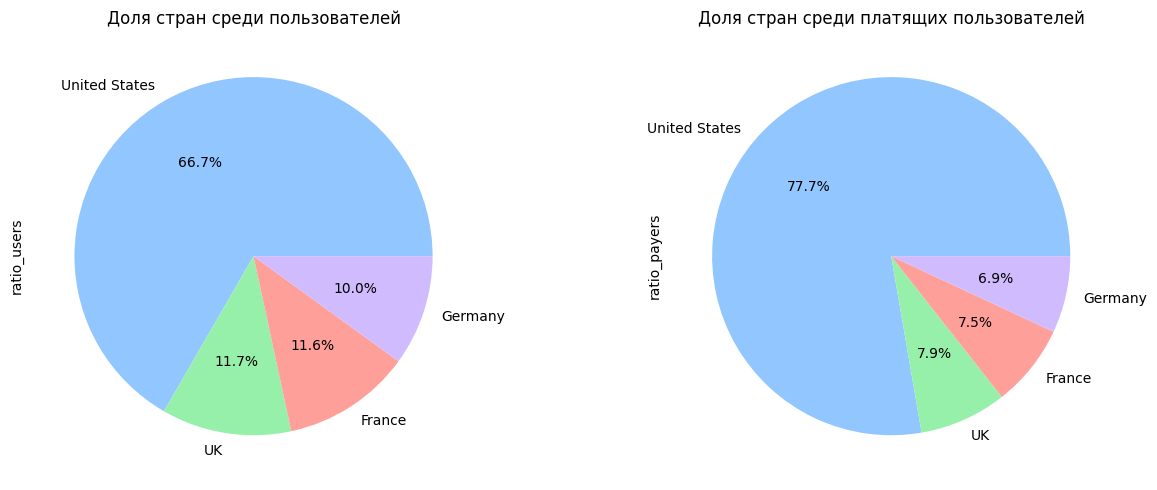

In [39]:
plt.figure(figsize=(13, 5))    
    
# первый график — Распределение пользователей по странам
ax1 = plt.subplot(1, 2, 1)    
ratio_region['ratio_users'].plot(kind='pie', labels=ratio_region.index, autopct='%1.1f%%', 
                                   legend=False, title='Доля стран среди пользователей')

# второй график - распределение платящих пользователей по странам.
ax2 = plt.subplot(1, 2, 2)
ratio_payer_region['ratio_payers'].plot(kind='pie', labels=ratio_payer_region.index, autopct='%1.1f%%', 
                                   legend=False, title='Доля стран среди платящих пользователей')
plt.tight_layout()
plt.show()

Большую часть платящих пользователей дает США - 77.7%.

Отобразим конверсию уникальных пользователей в платящих пользователей по каждой стране.

In [40]:
result = profile_cr(df=profiles, group='region')
disp_df(result)

Конверсия обычных пользователей в платящих в США составляет 6.9%, в Великобритании 4%, Франции 3.8%, Германии 4.1%.

Выведем результат на графике.

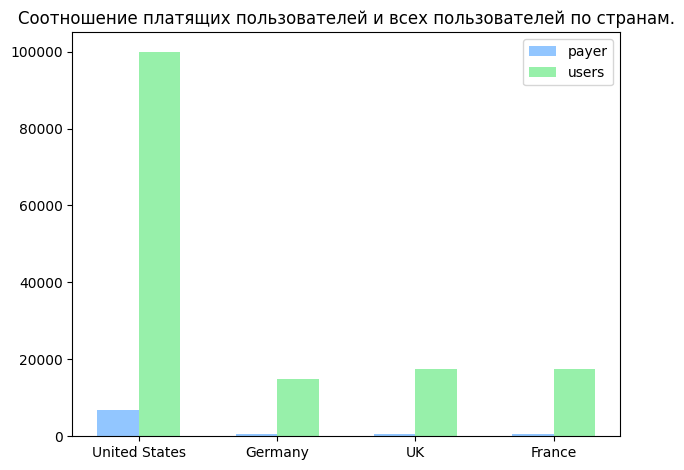

In [41]:
#  Третий график - соотношение платящих и неплатящих пользователей внутри страны. 

width = 0.3
x = np.arange(len(result))
ax3 = plt.subplot(1, 1, 1)
rects1 = ax3.bar(x - width/2, result['payers'], width, label='payer')
rects2 = ax3.bar(x + width/2, result['users'], width, label='users')
ax3.set_title('Соотношение платящих пользователей и всех пользователей по странам.')
ax3.set_xticks(x)
ax3.set_xticklabels(result.index)
ax3.legend()

plt.tight_layout()
plt.show()

#### Вывод. Количество пользователей и доля платящих из каждой страны

Пользователи приходят в приложение из четырех стран: США - 66.7% (100 002 человека), Великобритании - 11.7% (17 575 человек), Франции - 11.6% (17 450 человек), Германии - 10% (14 981 человек).

Больше всего платящих пользователей приходится на США 6902 человека или 77.7%.
Великобритания дает 7.9% платящих пользователей 700 человек, Франции - 7.5% 663 человека, Германии - 6.9% 616 человек.

Конверсия обычных пользователей в платящих в США составляет 6.9%, в Великобритании 4%, Франции 3.8%, Германии 4.1%.

#### Предпочитаемые пользователями устройства

In [42]:
disp_df(profile_ratio(df=profiles, group='device', payer=False))

Клиенты пользуются устройствами iPhone 36.3%, Android 23.4%, PC 20.3%, Mac 20%.

Предпочтения платящих пользователей.

In [43]:
disp_df(profile_ratio(df=profiles, group='device', payer=True))

Платящие клиенты предпочитают iPhone 38.1%, Android 23.1%, Mac 21.5%, PC 17.3%. Мобильных клиентов 61.2%. Значит особое внимание нужно уделять работе приложения на мобильных устройствах. 

Конверсия пользователей в платящих пользователей по типам устройств. 

In [44]:
disp_df(profile_cr(df=profiles, group='device'))

#### Вывод Предпочитаемые пользователями устройства

Клиенты пользуются устройствами iPhone 36.3%, Android 23.4%, PC 20.3%, Mac 20%.

Платящие клиенты предпочитают iPhone 38.1%, Android 23.1%, Mac 21.5%, PC 17.3%. Мобильных клиентов 61.2%. Значит, особое внимание нужно уделять работе приложения на мобильных устройствах.

Конверсия пользователей в платящих пользователей составляет: Mac 6.4%, iPhone 6.2%, Android 5.9%, PC 5%.

#### Рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей

Всего каналов привлечения.

In [45]:
profiles.groupby('channel').agg({'user_id': 'nunique'}).count()

user_id    11
dtype: int64

Распределение пользователей по каналам привлечения. 

In [46]:
# Всего пользователей по каналам привлечения
channel_users = profiles.groupby('channel').agg({'user_id': 'nunique'})
# Количество уникальных платящих пользователей по каналам привлечения
channel_payer_users = profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'})
# Объединяем результат
channel_users = channel_users.merge(channel_payer_users, on='channel', how = 'left')

# Уточняем названия столбцов
channel_users.columns = ['users', 'payers']

# Процент пользователей по данному каналу от всего пользователей
channel_users['ratio_users'] = channel_users['users'] / channel_users['users'].sum()
#  Процент платящих пользователей от всего платящих пользователей по этому каналу. 
channel_users['ratio_payers'] = channel_users['payers'] / channel_users['payers'].sum()
#  Процент платящих пользователей от всего пользователей по этому каналу. 
channel_users['ratio_payers_from_users'] = channel_users['payers'] / channel_users['users'].sum()

# Конверсия всех пользователей в платящих по этому каналу. 
channel_users['cr_payers'] = channel_users['ratio_payers_from_users'] / channel_users['ratio_users']

# Сортируем и форматируем результаты
channel_users.sort_values(by='ratio_payers_from_users', ascending=False, inplace=True)
channel_users.style.format({'ratio_users': '{:.1%}', 
                            'ratio_payers': '{:.1%}',
                            'ratio_payers_from_users': '{:.1%}',
                            'cr_payers': '{:.1%}'
                           })

Здесь:
- `ratio_users` - доля пользователей по каналу продвижения от общего числа пользователей;
- `ratio_payers` - доля платящих пользователей по каналу продвижения от общего числа платящих пользователей;
- `ratio_payers_from_users` - доля платящих пользователей по каналу продвижения от общего числа всех пользователей;
- `cr_payers` - конверсия пользователей в платящих пользователей по каналу продвижения.  

Процент привлеченных пользователей из каналов кроме первой тройки. 

In [47]:
round(channel_users.iloc[3:]['users'].sum() / channel_users['users'].sum() * 100, 1) 

29.9

#### Вывод. Рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей

Всего используется 11 каналов привлечения. 

Больше всего платящих пользователей пришло из каналов FaceBoom 3557 человек или 40.1% от общего числа платящих пользователей, TipTop 1878 человек (21.1%), organic 1160 (13.3%). Канал AdNonSense дал 440 человек (5%), WahooNetBanner 453 человека (5.1%). Прочие каналы дали от 156 до 262 человек каждый или 1.8 - 3% платящих пользователей. Каналы кроме TipTop, FaceBoom, organic дали 29.9% пользователей. 

В процентах от всех пользователей доля платящих составляет: 
FaceBoom 2.4%, TipTop 1.3%, organic 0.8%, AdNonSense 0.3%, WahooNetBanner 0.3%. Прочие каналы дали 0.1 - 0.2%.

Наилучшие коэффициенты конверсии привлеченных пользователей в платящих видим в каналах FaceBoom 12.4%, AdNonSense 11.5%, TipTop 10%. Чуть хуже в lambdaMediaAds 7.1%, RocketSuperAds 6.7%, WahooNetBanner 5.3%.

#### Спорные пользователи канала organic

Значительное количество пользователей пришло из канала organic - 37.6%. Проверим есть ли по этим пользователям платные закупки. 

In [48]:
profiles.loc[profiles['channel'] == 'organic'].head()

user_id            first_ts  channel   device         region         dt  \
2    6085896 2019-10-01 09:58:33  organic   iPhone         France 2019-10-01   
5   34186288 2019-05-09 17:29:23  organic  Android  United States 2019-05-09   
6   38448301 2019-08-16 11:56:00  organic  Android  United States 2019-08-16   
10  62222884 2019-06-19 15:14:57  organic   iPhone        Germany 2019-06-19   
11  64614231 2019-10-22 09:51:19  organic  Android             UK 2019-10-22   

        month  payer  acquisition_cost  
2  2019-10-01  False               0.0  
5  2019-05-01  False               0.0  
6  2019-08-01  False               0.0  
10 2019-06-01  False               0.0  
11 2019-10-01  False               0.0

In [49]:
visits.head(3)

user_id         region  device  channel       session_start  \
0  981449118918  United States  iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic 2019-05-01 14:09:25   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08

Идентификаторы пользователей, пришедших из канала organic.

In [50]:
organic_id = profiles.loc[profiles['channel'] == 'organic']['user_id']
organic_id.head(3)

2     6085896
5    34186288
6    38448301
Name: user_id, dtype: int64

Количество пользователей, которые отнесены к каналу organic и которые имеют записи о визитах с платных рекламных каналов.

In [51]:
debatable_users = visits.query('user_id in @organic_id and channel != "organic"').pivot_table(
    index='channel', values='user_id', aggfunc='nunique').sum()
debatable_users

user_id    1572
dtype: int64

Процент спорных пользователей от общего количества пользователей organic. 

In [52]:
round(debatable_users / 56439 * 100, 1)

user_id    2.8
dtype: float64

Посмотрим на некоторых пользователей. 

In [53]:
# id пользователей, отнесенных к каналу organic и имеющих посещения с других спорных каналов. 
debatable_id = visits.query('user_id in @organic_id and channel != "organic"')['user_id']
visits.query('user_id in @debatable_id').sort_values(by=['user_id', 'session_start']).head(10)

user_id         region   device             channel  \
170339   201829675  United States       PC             organic   
171393   201829675  United States       PC            FaceBoom   
174258   201829675  United States       PC            FaceBoom   
36690    367679392  United States      Mac             organic   
43875    367679392  United States      Mac        MediaTornado   
47819    397006821  United States      Mac             organic   
48643    397006821  United States      Mac        MediaTornado   
244070  1101776810        Germany  Android             organic   
244402  1101776810        Germany  Android  OppleCreativeMedia   
245316  1101776810        Germany  Android             organic   

             session_start         session_end  
170339 2019-10-02 06:22:55 2019-10-02 06:55:08  
171393 2019-10-03 14:41:33 2019-10-03 14:44:03  
174258 2019-10-05 18:04:05 2019-10-05 18:21:27  
36690  2019-06-07 06:34:18 2019-06-07 06:53:56  
43875  2019-06-16 18:37:50 2019-06-16 19:05:12  
47819  2019-06-20 01:04:09 2019-06-20 01:35:27  
48643  2019-06-21 23:02:50 2019-06-21 23:04:25  
244070 2019-07-12 11:40:41 2019-07-12 11:55:18  
244402 2019-07-13 07:43:24 2019-07-13 08:02:39  
245316 2019-07-15 14:24:58 2019-07-15 15:25:57

Проверим, есть ли пользователи у которых несколько платных каналов привлечения. 

In [54]:
visits.query('user_id in @debatable_id and channel != "organic"').pivot_table(index='user_id', columns='channel', 
    values='session_start', aggfunc='count').T.count().sort_values(ascending=False).head(10)

user_id
66261710286     4
508067661069    3
597661910247    3
842052040339    3
971284236917    3
388851901664    3
445230891031    3
896941673419    3
895988402104    3
791612896135    3
dtype: int64

Такие пользователи есть. Посмотрим на одного из них.

In [55]:
visits.query('user_id == 66261710286').sort_values(by='session_start').head(15)

user_id         region   device         channel  \
51161   66261710286  United States  Android         organic   
52061   66261710286  United States  Android        FaceBoom   
53154   66261710286  United States  Android  RocketSuperAds   
55427   66261710286  United States  Android  RocketSuperAds   
56669   66261710286  United States  Android  RocketSuperAds   
57911   66261710286  United States  Android  RocketSuperAds   
63070   66261710286  United States  Android          TipTop   
66689   66261710286  United States  Android  RocketSuperAds   
71260   66261710286  United States  Android  RocketSuperAds   
74277   66261710286  United States  Android  RocketSuperAds   
84291   66261710286  United States  Android  RocketSuperAds   
86020   66261710286  United States  Android  RocketSuperAds   
94843   66261710286  United States  Android  RocketSuperAds   
115146  66261710286  United States  Android  RocketSuperAds   
116307  66261710286  United States  Android  RocketSuperAds   

             session_start         session_end  
51161  2019-06-23 21:36:16 2019-06-23 21:53:36  
52061  2019-06-24 21:11:00 2019-06-24 21:46:21  
53154  2019-06-25 15:47:01 2019-06-25 16:31:43  
55427  2019-06-27 08:19:54 2019-06-27 11:04:44  
56669  2019-06-28 05:30:41 2019-06-28 05:30:57  
57911  2019-06-29 03:24:58 2019-06-29 03:58:40  
63070  2019-07-03 20:16:56 2019-07-03 20:40:50  
66689  2019-07-06 12:42:50 2019-07-06 12:54:05  
71260  2019-07-10 04:33:01 2019-07-10 05:00:22  
74277  2019-07-13 18:34:34 2019-07-13 18:43:09  
84291  2019-07-24 01:53:02 2019-07-24 02:07:12  
86020  2019-07-26 12:17:00 2019-07-26 12:46:24  
94843  2019-08-03 09:03:49 2019-08-03 09:05:32  
115146 2019-08-20 05:05:54 2019-08-20 05:24:30  
116307 2019-08-21 19:50:13 2019-08-21 20:03:14

Не видим прямой закономерности, к какому платному каналу отнести пользователя.

Посмотрим на оплаты такого пользователя. 

In [56]:
orders.query('user_id == 66261710286').sort_values(by='event_dt').head(15).style.format(formatter='$ {:.2f}', subset='revenue')

Оплаты не являются ритмичными по датам. Закономерность не прослеживается.  

Общее количество платящих пользователей отнесенных к каналу organic.  

In [57]:
profiles.loc[(profiles['payer']) & (profiles['channel'] == 'organic')]['user_id'].count()

1160

Общее количество платящих пользователей, являющихся спорными по атрибуции.  

In [58]:
profiles.query('user_id in @debatable_id and payer')['user_id'].count()

384

Процент спорных платящих пользователей, отнесенных к каналу organic, от общего числа платящих пользователей, отнесенныех к каналу organic. 

In [59]:
round(profiles.query('user_id in @debatable_id and payer')['user_id'].count() / \
profiles.loc[(profiles['payer']) & (profiles['channel'] == 'organic')]['user_id'].count() * 100, 1)

33.1

Общий процент платящих пользователей, отнесенных к каналу organic. 

In [60]:
round(profiles.query('channel == "organic"')['payer'].mean() * 100, 1)

2.1

#### Вывод Спорные пользователи канала organic

Видим значительное количество пересечений входов пользователей с бесплатных каналов привлечения и с платных. 
Это достаточно обычная ситуация. Пользователи входят то по рекламным объявлениям, то через прямой поиск. 

Оставляем принятую по умолчанию стратегию присвоения пользователя каналу - по первой сессии. 

При этом среди платящих пользователей, отнесенных к каналу organic, 56.9% имеют спорную атрибуцию: имеют визиты как с канала organic, так и с платных каналов продвижения.  
Изучение влияния спорных сессий пользователей на окупаемость рекламы можно провести отдельно. 

### Маркетинг

Общая сумма расходов на маркетинг в далларах.

In [61]:
round(ad_costs['costs'].sum(), 2)

105497.3

#### Распределение бюджета по рекламным источникам

In [62]:
# Затраты по каналам привлечения
costs_ratio = ad_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
# Доля канала в общих затратах на рекламу
costs_ratio['ratio_costs'] = costs_ratio['costs'] / costs_ratio['costs'].sum()
# Добавим информацию по платящим пользователям
costs_ratio = costs_ratio.merge(channel_users, on='channel', how='left')
# Доля канала среди платящих пользователей
costs_ratio['cr_costs_payers'] = costs_ratio['ratio_payers_from_users'] / costs_ratio['ratio_costs']
# costs_ratio
# Выведем на экран
costs_ratio[['costs', 'ratio_costs', 'ratio_payers_from_users', 'cr_costs_payers']].style.format({
    'costs': '${:.2f}', 
    'ratio_costs': '{:.1%}', 
    'ratio_payers_from_users': '{:.1%}', 
    'cr_costs_payers': '{:.1%}'
})

Самый большой бюджет у канала **TipTop 54 751.30 доллара или 51.9%**. При этом в платящих пользователи этого канала конвертируются хуже всего (2.4%). 

Канал FaceBoom дает 30.8% бюджета (32 445.60 доллара), конверсия в платящих 7.7%.
WahooNetBanner 4.9% (5 151.00 доллара) cr 6.2%, AdNonSense 3.7% (3 911.25 доллара) cr 7.9%. 

Прочие каналы дают в бюджет менее 2% с конверсией в платящих от 7.6% до 13.5%.

Посчитаем медиану конвертации бюджета на маркетинг в платящих пользователей. 

In [63]:
cr_costs_payer_median = costs_ratio['cr_costs_payers'].median()
round(cr_costs_payer_median * 100, 2)

9.04

Выберем каналы с коэффициентом конверсии пользователей в платящих пользователей выше медианы. 

In [64]:
(costs_ratio.loc[costs_ratio['cr_costs_payers'] > cr_costs_payer_median, 
                ['costs', 'ratio_costs', 'ratio_payers_from_users', 'cr_costs_payers']]
.style.format({'costs': '${:.2f}', 'ratio_costs': '{:.1%}', 
               'ratio_payers_from_users': '{:.1%}', 'cr_costs_payers': '{:.1%}'})
)

Предварительно целесообразно увеличить финансирование каналов продвижения: **OppleCreativeMedia, RocketSuperAds, LeapBob, MediaTornado, YRabbit** так как привлеченные с них пользователи лучше всего конвертируются в платящих (от 10% до 11.8%).

Зададим стиль линий графика. 

In [65]:
# plt.style.available
try:
    plt.style.use('seaborn-bright')
    plt.style.use('seaborn-whitegrid') 
except:
    plt.style.use('seaborn-v0_8-bright')    
    plt.style.use('seaborn-v0_8-whitegrid')

**График с визуализацией динамики изменения расходов по неделям по всем источникам и график динамики изменения расходов по месяцам суммарно по всем источникам привлечения клиентов.** 

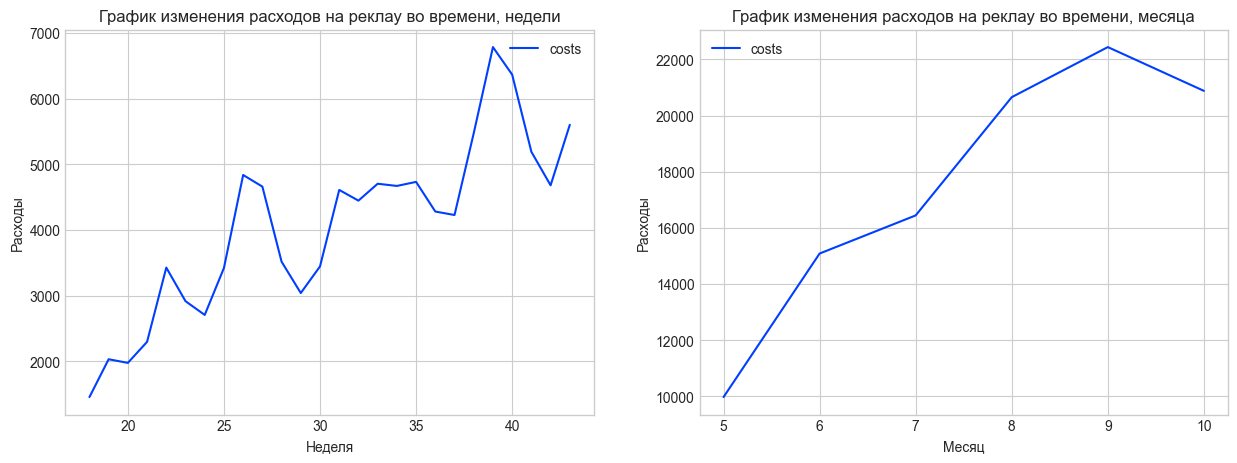

In [66]:
plt.figure(figsize=(15,5))

# Первый график - динамика расходов по неделям. 
ax1 = plt.subplot(1, 2, 1)
result = ad_costs.pivot_table(index='week', values='costs', aggfunc='sum')
# display(result.head())
result.plot(ax=ax1, title='График изменения расходов на реклау во времени, недели', 
                       xlabel='Неделя', ylabel='Расходы', grid=True, linestyle='-');


# Второй график - динамика расходов по месяцам. 
ax2 = plt.subplot(1, 2, 2)
result = ad_costs.pivot_table(index='month', values='costs', aggfunc='sum')
# display(result.head())
result.plot(ax=ax2, title='График изменения расходов на реклау во времени, месяца', 
                       xlabel='Месяц', ylabel='Расходы', grid=True, linestyle='-');

plt.show()

Расходы на рекламу росли месяц к месяцу с мая по сентябрь от 10 тыс. долларов до 220 тыс. долларов, затем стали снижаться и достигли 210 тыс. долларов в октябре.

Внутри месяца расходы на рекламу распределены неравномерно. 

**График с визуализацией динамики изменения расходов по неделям по каждому источнику и график динамики изменения расходов по месяцам по каждому источнику.** 

Посмотрим на динамику расходов на рекламу по каждому платному источнику привлечения пользователей. 

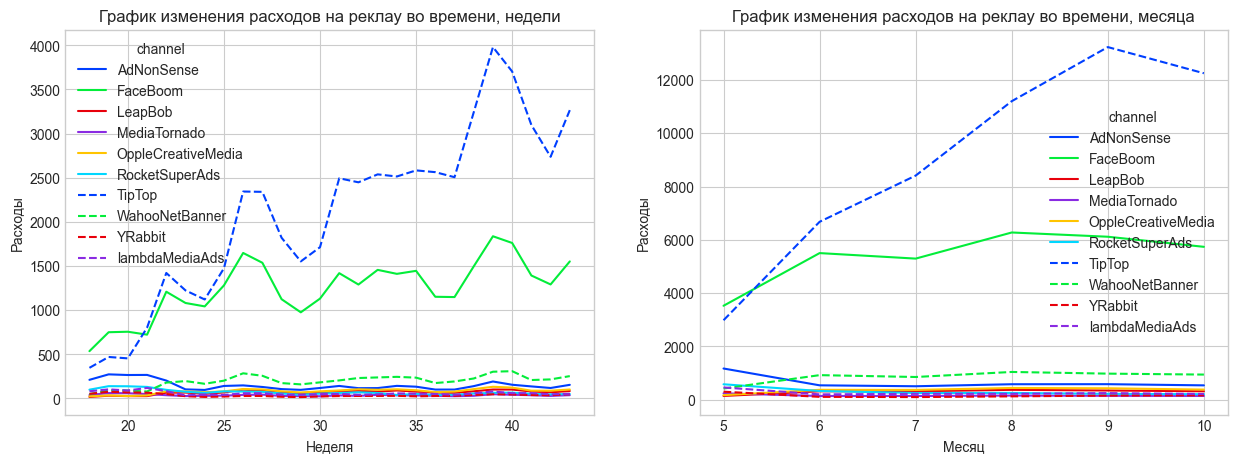

In [67]:
plt.figure(figsize=(15,5))

# Первый график - динамика расходов по неделям. 
ax1 = plt.subplot(1, 2, 1)
result = ad_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
# display(result.head())
result.iloc[:, :6].plot(ax=ax1, title='График изменения расходов на реклау во времени, недели', 
                       xlabel='Неделя', ylabel='Расходы', grid=True, linestyle='-');
result.iloc[:, 6:].plot(ax=ax1, title='График изменения расходов на реклау во времени, недели', 
                       xlabel='Неделя', ylabel='Расходы', grid=True, linestyle='--');

# Второй график - динамика расходов по месяцам. 
ax2 = plt.subplot(1, 2, 2)
result = ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
# display(result.head())
result.iloc[:, :6].plot(ax=ax2, title='График изменения расходов на реклау во времени, месяца', 
                       xlabel='Месяц', ylabel='Расходы', grid=True, linestyle='-');
result.iloc[:, 6:].plot(ax=ax2, title='График изменения расходов на реклау во времени, месяца', 
                       xlabel='Месяц', ylabel='Расходы', grid=True, linestyle='--');

plt.show()

Весь рост расходов на рекламу дали два канала привлечения пользователей: TipTop и FaceBoom. В прочих каналах расходы на рекламу меняются незначительно.  

#### Вывод. Распределение бюджета по рекламным источникам

Общая сумма расходов на маркетинг $ 105 497.30

Самый большой бюджет у канала TipTop 54 751.30 доллара или 51.9%. При этом в платящих пользователи этого канала конвертируются хуже всего (2.4%). 

Канал FaceBoom дает 30.8% бюджета (32 445.60 доллара), конверсия в платящих 7.7%.
WahooNetBanner 4.9% (5 151.00 доллара) cr 6.2%, AdNonSense 3.7% (3 911.25 доллара) cr 7.9%. 

Прочие каналы дают в бюджет менее 2% с конверсией в платящих от 7.6% до 13.5%.

Предварительно целесообразно увеличить финансирование каналов продвижения: OppleCreativeMedia, RocketSuperAds, LeapBob, MediaTornado, YRabbit так как привлеченные с них пользователи лучше всего конвертируются в платящих (от 10% до 11.8%).

Расходы на рекламу росли месяц к месяцу с мая по сентябрь от 10 тыс. долларов до 220 тыс. долларов, затем стали снижаться и достигли 210 тыс. долларов в октябре.

Весь рост расходов на рекламу дали два канала привлечения пользователей: TipTop и FaceBoom. В прочих каналах расходы на рекламу меняются незначительно.

Внутри месяца расходы на рекламу распределены неравномерно. 

#### Средняя стоимость привлечения одного пользователя из каждого источника рекламы

In [68]:
# Средняя стоимость привлечения пользователя по каналам
acquisition_cost_mean = round(profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(
    by='acquisition_cost', ascending=False), 2)
# Переименуем колонки
acquisition_cost_mean.columns = ['acquisition_cost_user']
acquisition_cost_mean['k_next'] = round(acquisition_cost_mean['acquisition_cost_user'].shift(1).div(
    acquisition_cost_mean['acquisition_cost_user'], axis=0), 1)
acquisition_cost_mean

acquisition_cost_user  k_next
channel                                          
TipTop                               2.80     NaN
FaceBoom                             1.11     2.5
AdNonSense                           1.01     1.1
lambdaMediaAds                       0.72     1.4
WahooNetBanner                       0.60     1.2
RocketSuperAds                       0.41     1.5
OppleCreativeMedia                   0.25     1.6
YRabbit                              0.22     1.1
MediaTornado                         0.22     1.0
LeapBob                              0.21     1.0
organic                              0.00     inf

Построим график.

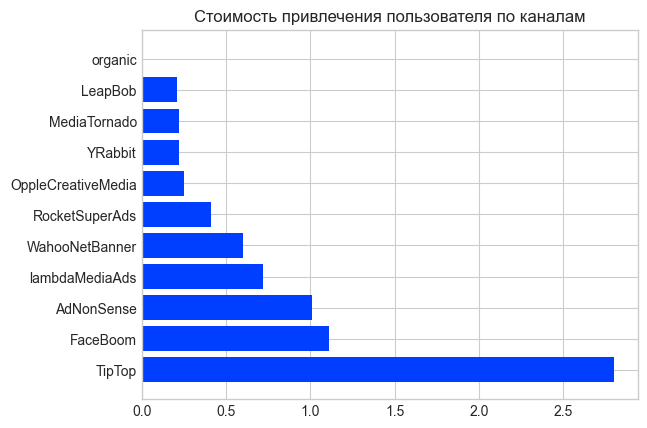

In [69]:
plt.barh(acquisition_cost_mean.index, acquisition_cost_mean['acquisition_cost_user']);
plt.title('Стоимость привлечения пользователя по каналам');
plt.show()

В среднем, привлечение одного пользователя из канала TipTop в 2.5 раза дороже пользователей FaceBoom и в 2.75 раза дороже пользователей AdNonSense. При этом конверсия в платящих в канале TipTop в три раза хуже, чем в FaceBoom. 

Средняя цена привлечения пользователя по каналам (долларов за человека):
TipTop 2.8, FaceBoom 1.11, AdNonSense 1.01, lambdaMediaAds 0.72, WahooNetBanner 0.60.
В прочих каналах средняя цена привлечения ниже 0.41 доллара за человека. 

Посчитаем среднюю стоимость платящего пользователя по каналам.

In [70]:
# Объединим с выборкой по количеству пользователй и платящих пользователей
acquisition_cost_mean = acquisition_cost_mean.merge(channel_users, on='channel')
# Посчитаем среднюю стоимость платящего пользователя по каналам
acquisition_cost_mean['acquisition_cost_payer'] = round(acquisition_cost_mean['acquisition_cost_user'] * \
    acquisition_cost_mean['users'] / acquisition_cost_mean['payers'], 2)
# Отсортируем в порядке убывания средней стоимости платящего пользователя
(acquisition_cost_mean[['acquisition_cost_user', 'acquisition_cost_payer']]
 .sort_values(by='acquisition_cost_payer',ascending=False)
)

acquisition_cost_user  acquisition_cost_payer
channel                                                          
TipTop                               2.80                   29.16
WahooNetBanner                       0.60                   11.33
OppleCreativeMedia                   0.25                    9.23
FaceBoom                             1.11                    9.09
AdNonSense                           1.01                    8.91
lambdaMediaAds                       0.72                    6.88
LeapBob                              0.21                    6.86
MediaTornado                         0.22                    6.15
YRabbit                              0.22                    5.75
RocketSuperAds                       0.41                    5.18
organic                              0.00                    0.00

#### Вывод. Средняя стоимость привлечения одного пользователя из каждого источника рекламы

В среднем, привлечение одного пользователя из канала TipTop в 2.5 раза дороже пользователей FaceBoom и в 2.75 раза дороже пользователей AdNonSense. При этом конверсия в платящих в канале TipTop в три раза хуже, чем в FaceBoom. 

Средняя цена привлечения пользователя по каналам (долларов за человека):
TipTop 2.8, FaceBoom 1.11, AdNonSense 1.01, lambdaMediaAds 0.72, WahooNetBanner 0.60.
В прочих каналах средняя цена привлечения пользователя ниже 0.41 доллара за человека. 

С учетом конверсии обычных пользователей в платящих самые дорогие платящие пользователи в канале TipTop в среднем 29.16 доллара за человека. В два с половиной раза дешевле в канале WahooNetBanner - 11.33. Средняя стоимость в OppleCreativeMedia 9.23, FaceBoom 9.09, AdNonSense 8.91. В прочих каналах стоимость ниже 7 долларов.

### Окупаемость рекламы

Выполним расчет окупаемости рекламы. За дату составления отчета примем 1 ноября 2019 года. 

In [71]:
observation_date = pd.to_datetime('2019-11-01')
observation_date

Timestamp('2019-11-01 00:00:00')

В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Укажем горизонт анализа.

In [72]:
horizon_days = 14

Органические пользователи приходят к нам без инвестиций в рекламу, окупаемость мгновенная. При этом канал organic дает 13.3% всех платящих пользователей. Исключим этих пользователей из анализа окупаемости рекламы. 

In [73]:
profiles_ad = profiles.query('channel != "organic"')
profiles_ad['channel'].value_counts()

channel
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: count, dtype: int64

#### Окупаемость рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Произведем вычисления LTV и ROI.

In [146]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days)
print('ltv')
display(ltv, horizon_days)
print('roi')
disp(roi, horizon_days)

ltv


cohort_size      0.0       1.0       2.0       3.0       4.0  \
cohort                                                                    
All users        88056  0.34561  0.435864  0.504509  0.561017  0.611529   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.654408  0.694389  0.730038  0.764772  0.796861  0.826319   

               11.0      12.0      13.0  
cohort                                   
All users  0.852183  0.878063  0.902137

14

roi


Построим графики LTV и ROI.

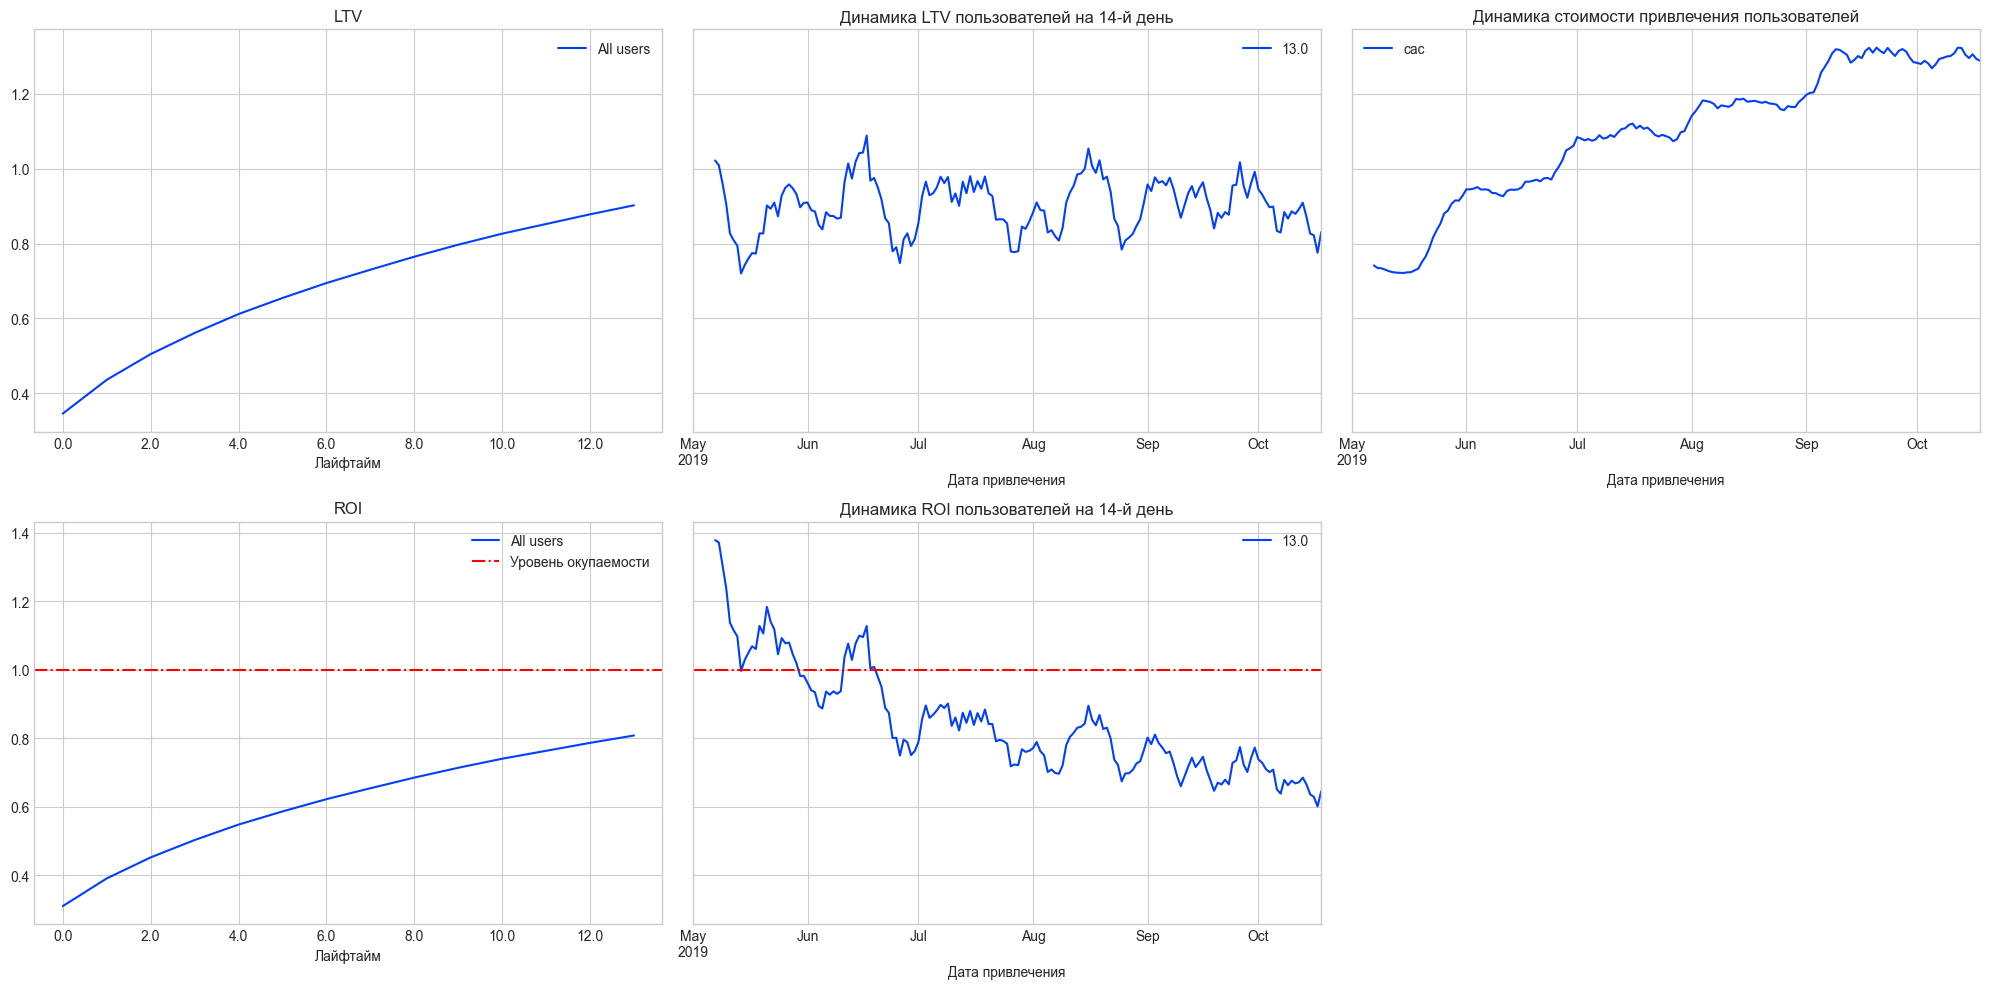

In [75]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Вывод. Окупаемость рекламы

В среднем выручка от пользователя достигает 0.9 доллара на 14-й день, колебание по месяцам есть, но небольшое от 0.8 до 1.1 доллара. 

Стоимость привлечения пользователей в первой половине мая составила 0.7 доллара и начала расти со средины мая, достигнув 1.3 доллара в октябре. 

В целом в заданные бизнес-планом сроки реклама не окупается. Реклама окупалась в мае 2019 года и в середине июня. 
В остальные промежутки времени окупаемости рекламы в четырнадцати дневный срок не наблюдается. 

При стабильном уровне выручки от клиента расходы на рекламу растут за счет двух каналов привлечения пользователей TipTop и FaceBoom. Это может говорить о росте конкуренции на канале или о росте рекламного бюджета по каналу. 

#### Конверсия пользователей и динамика её изменения

Посчитаем конверсию пользователей и выведем график.

In [76]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_ad, orders, 
                                                                observation_date, horizon_days)
disp(conversion, horizon_days)

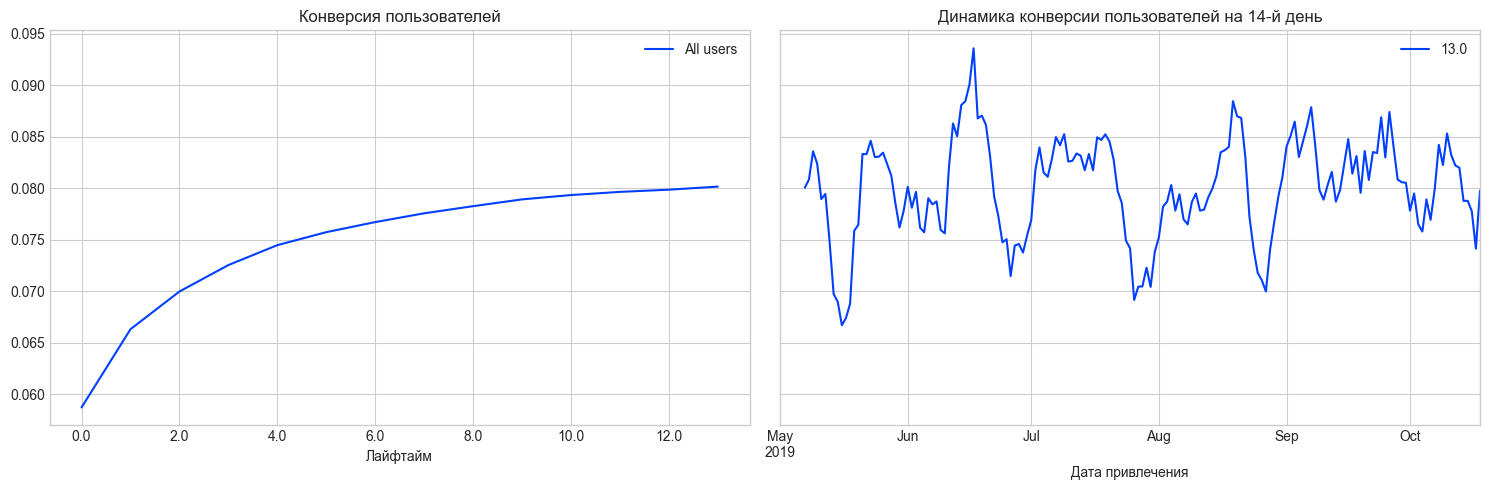

In [77]:
plot_conversion(conversion, conversion_history, horizon_days, window=7)

#### Вывод. Конверсия пользователей и динамика её изменения

#### Вывод. Конверсия пользователей и динамика её изменения

Наибольшая скорость конверсии пользователей в платящих клиентов наблюдается до третьего дня, далее конверсия замедляется. В среднем пользователи конвертируются в 8% случаев. 

С июня по август конверсия понижалась в конце месяца до 7%, затем восстанавливалась.
Пик конверсии наблюдался в середине июня - 9.4%. 

#### Конверсия пользователей по устройствам

Вычислим конверсию по устройствам. 

In [78]:
conversion_device_raw, conversion_device, conversion_device_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['device'])
disp(conversion_device, horizon_days)

Построим графики. 

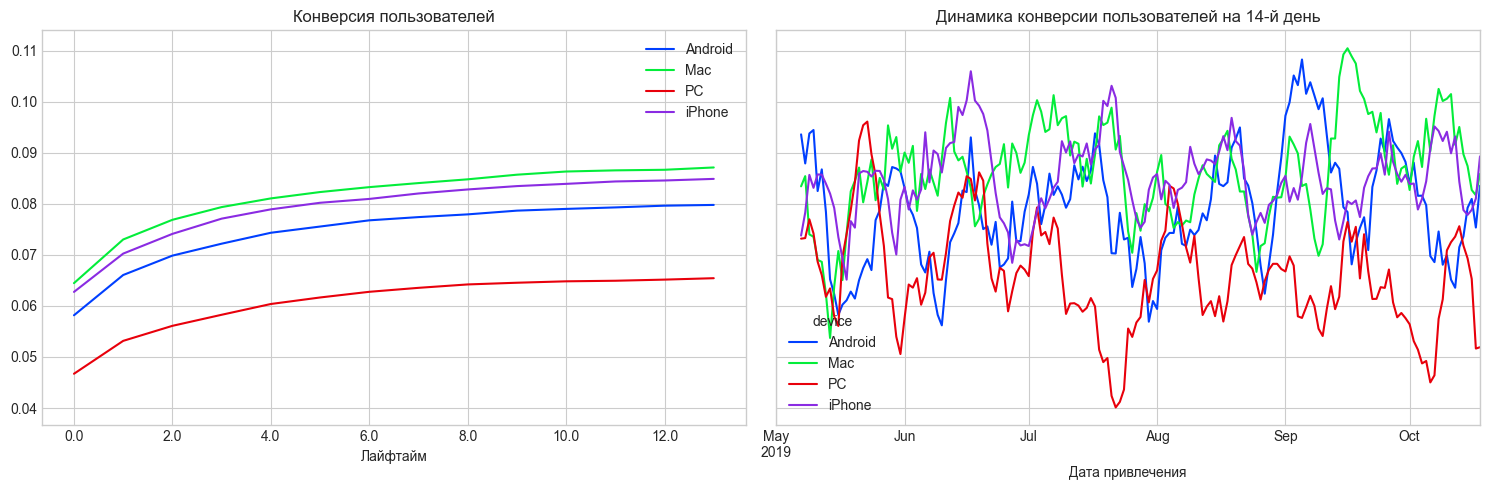

In [79]:
plot_conversion(conversion_device, conversion_device_history, horizon_days, window=7)

#### Вывод. Конверсия пользователей по устройствам

Конверсия пользователей по устройствам: Mac 8.7%, iPhone 8.5%, Android 8%, PC 6.5%.

Конверсия 14-го дня по устройствам колеблется от даты к дате в пределах 3 - 5%, что говорит о высокой конкуренции.
Сильнее всего меняется конверсия на устройствах PC. 

#### Конверсия пользователей по регионам

Вычислим конверсию по регионам. 

In [80]:
conversion_region_raw, conversion_region, conversion_region_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['region'])
disp(conversion_region, horizon_days)

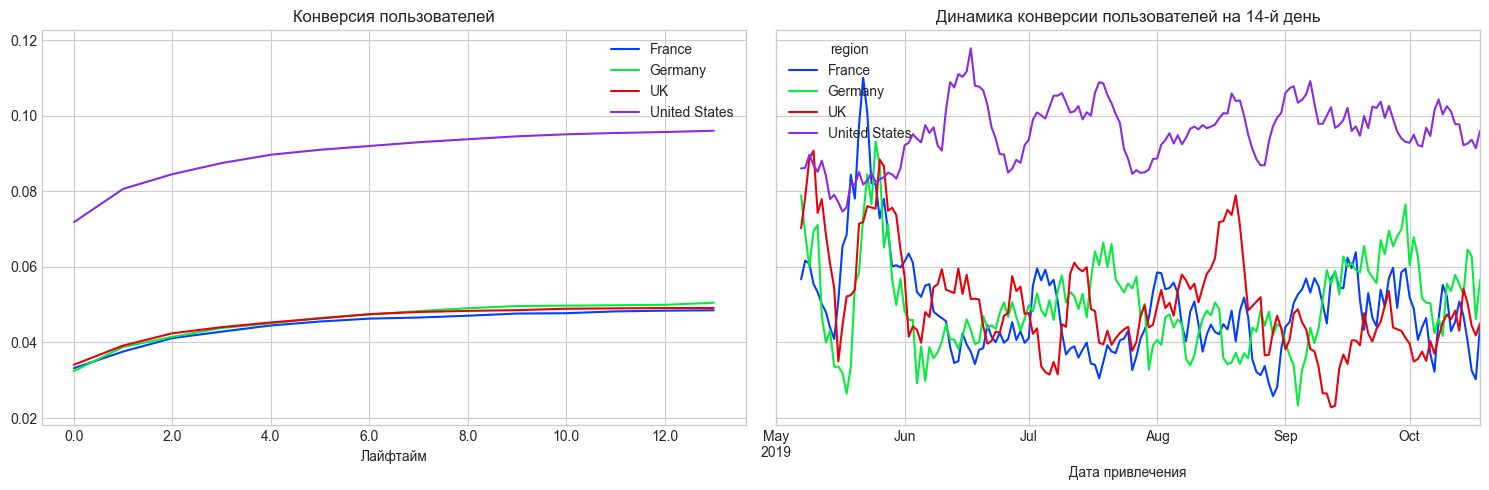

In [81]:
plot_conversion(conversion_region, conversion_region_history, horizon_days, window=7)

#### Вывод. Конверсия пользователей по регионам

Конверсия пользователей в США 9.6% существенно выше конверсии в других странах 4.8 - 5.1%.

Наибольшие скачки конверсии 14-го дня по всем странам наблюдались во второй половине мая. Показатель достигал 9 - 11%. 

В дальнейшем конверсия по Великобритании, Германии, Франции понизилась до уровня 5%, в США сохранилась на уровне 8%.  

Любопытно, что динамика конверсии США становится с течением времени не такой волатильной.

#### Конверсия пользователей по каналам продвижения

Проведем вычисления. 

In [82]:
conversion_channel_raw, conversion_channel, conversion_channel_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['channel']
)
disp(conversion_channel, horizon_days)

Простроим графики. 

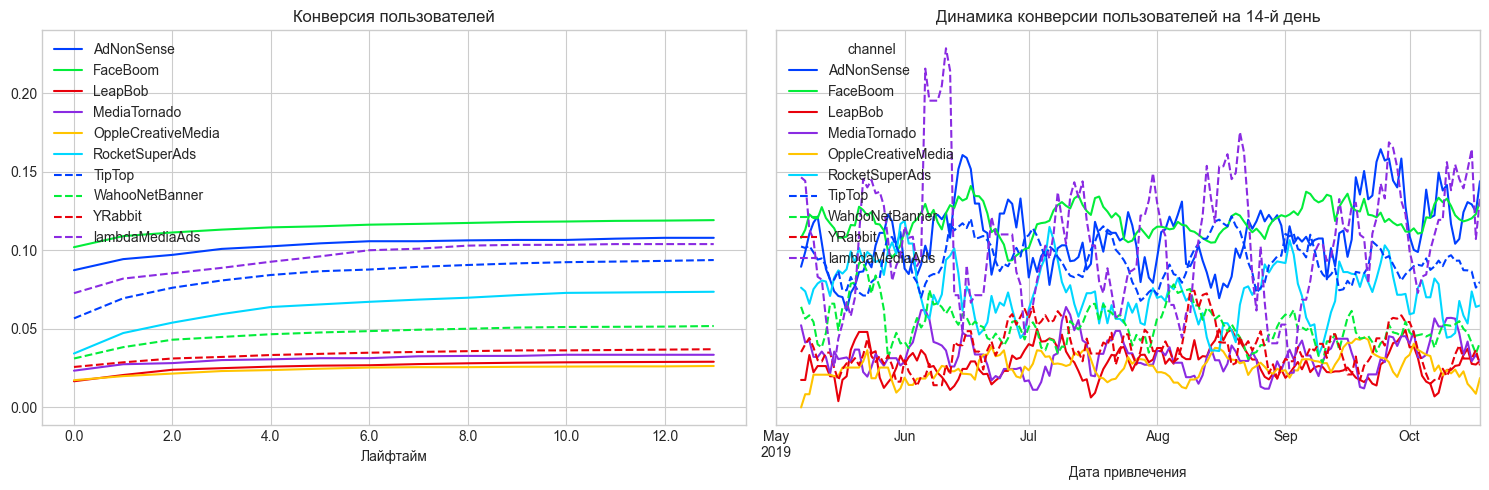

In [83]:
plot_conversion(conversion_channel, conversion_channel_history, horizon_days, window=7)

#### Вывод. Конверсия пользователей по каналам продвижения

Конверсия пользователей в платящих пользователей по каналам FaceBoom 11.9%, AdNonSense 10.8%, lambdaMediaAds 10.4%, TipTop 9.4%, RocketSuperAds 7.4% существенно выше, чем у других каналов. 

Прочие каналы привлечения дают конверсию до 5.2%.

Конверсии пользователей на 14-й день от месяца к месяцу по каналам FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds меняется значительно больше, чем по другим каналам. Вероятно, это связано с активной конкуренцией на каналах. 

#### Удержание пользователей и динамика изменения удержания

Посчитаем удержание пользователей и выведем график.

In [84]:
retention_raw, retention, retention_history = get_retention(profiles_ad, visits, observation_date, horizon_days)
disp(retention, horizon_days)

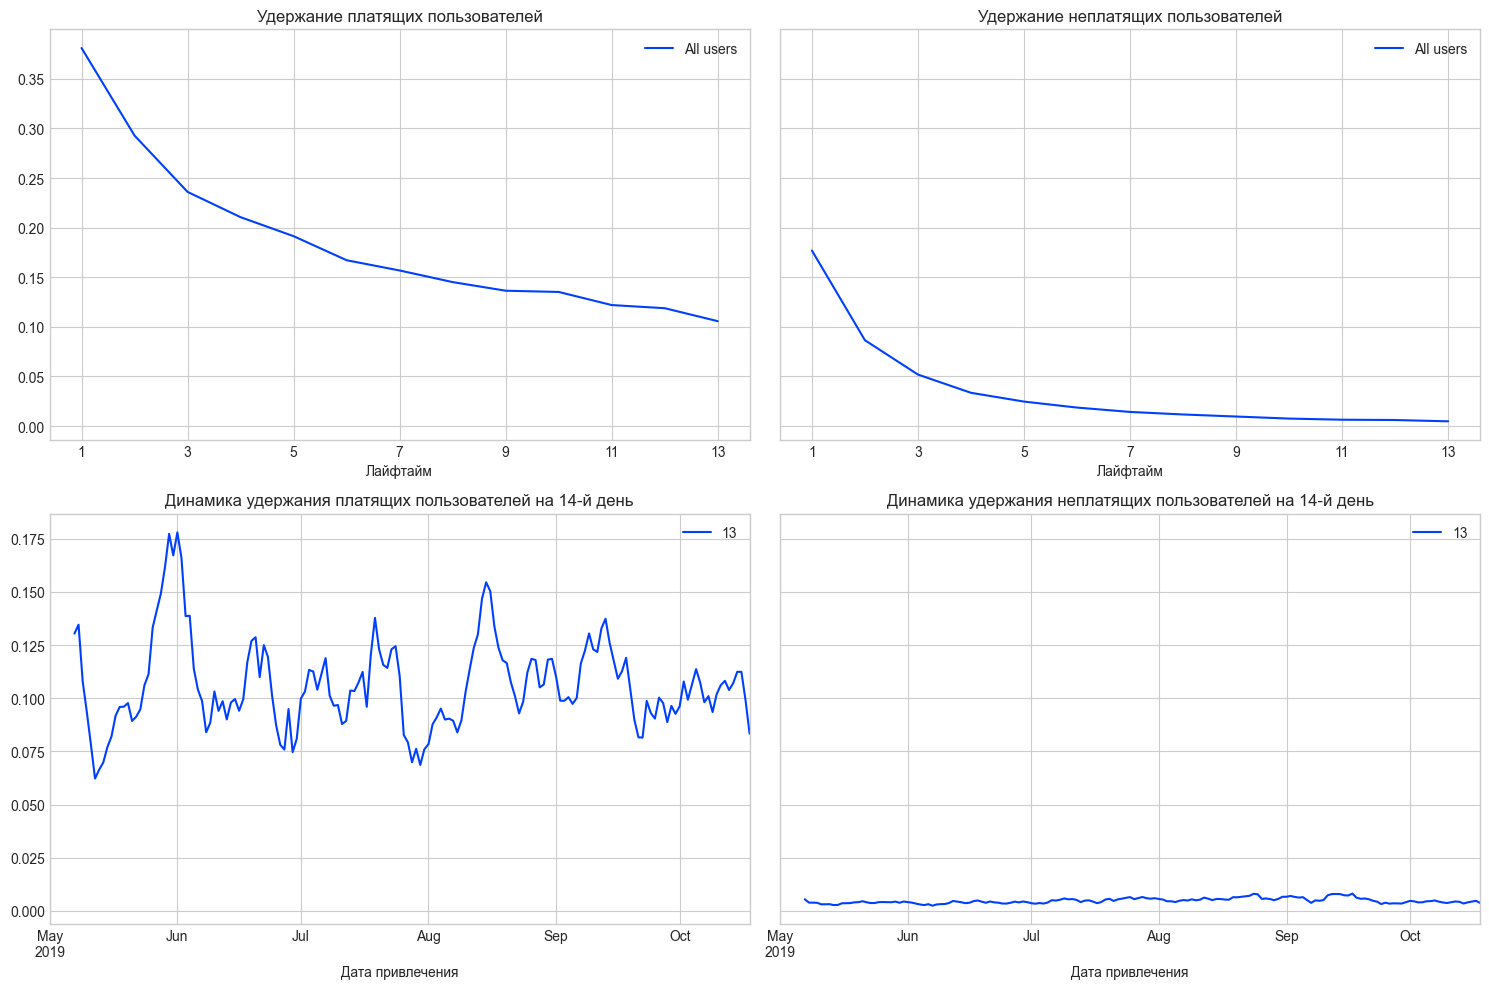

In [85]:
plot_retention(retention, retention_history, horizon_days, window=7)

#### Вывод. Удержание пользователей и динамика изменения удержания

Наибольшее падение удержания пользователей наблюдается в первые три дня жизненного цикла клиента. 
Далее удержание падает более плавно. 

Удержание платящих пользователей в первые пять дней в 3 - 4 раз выше, чем неплатящих. 

На 14-й день удержание неплатящих пользователей стремится к нулю, удержание платящих сохраняется на уровне около 10%.

Удержание платящих пользователей на 14-й день колеблется от недели к неделе. Пики приходились на конец мая 17.5%, средину июня 12.5%, вторую половину июля 13%, средину августа 15%, средину сентября 13%.

#### Удержание пользователей по устройствам и динамика изменения удержания

Выполним расчеты. 

In [86]:
retention_raw, retention, retention_history = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days,
                                                            dimensions=['device'])
disp(retention.query('payer == True'), horizon_days)
disp(retention.query('payer == False'), horizon_days)

Построим графики. 

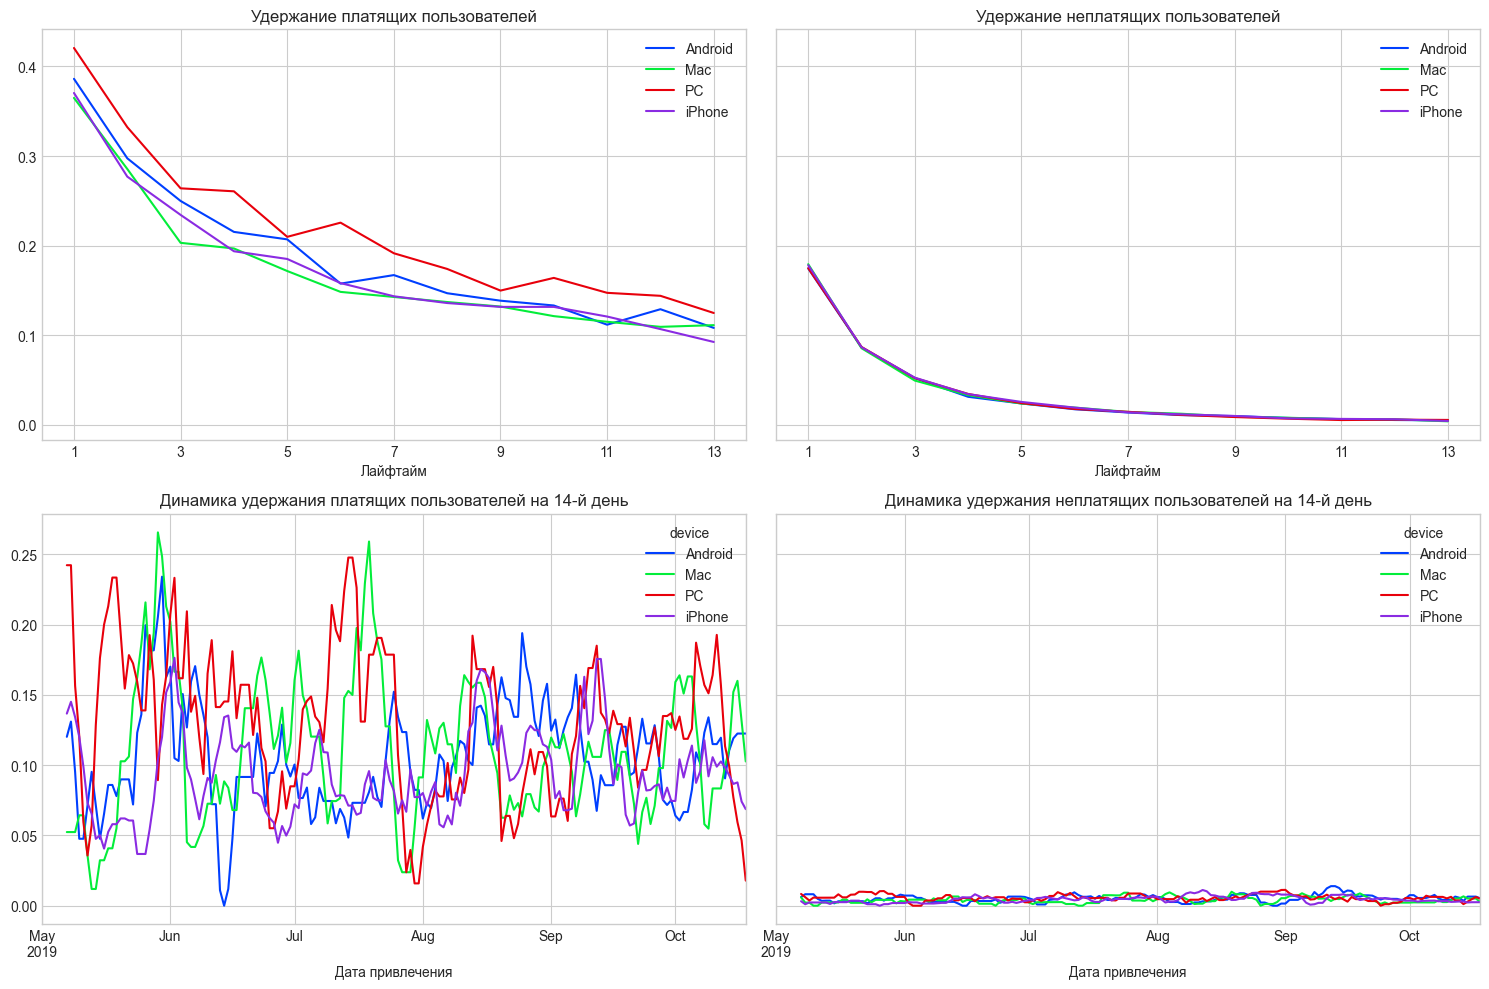

In [87]:
plot_retention(retention, retention_history, horizon_days, window=7)

#### Вывод. Удержание пользователей по устройствам и динамика изменения удержания

Сред платящих пользователей более хорошее удержание наблюдаем для устройств PC 12.5%. На втором месте Android. Хуже всего удержание в динамике у устройств Mac и iPhone. 

В динамике от месяца к месяцу больше всего колеблется удержание для PC и Mac - до 20%. Для мобильных устройств колебания доходят до 15%. Изменения удержания, вероятно, связаны с доработками приложения.  

Удержание неплатящих пользователей по всем устройствам соизмеримы и стремятся на 14-й день к 0.4 - 0.6%. 

#### Удержание пользователей по регионам и динамика изменения удержания

Выполним расчеты. 

In [88]:
retention_raw, retention, retention_history = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days,
                                                            dimensions=['region'])
disp(retention.query('payer == True'), horizon_days)
disp(retention.query('payer == False'), horizon_days)

Построим графики. 

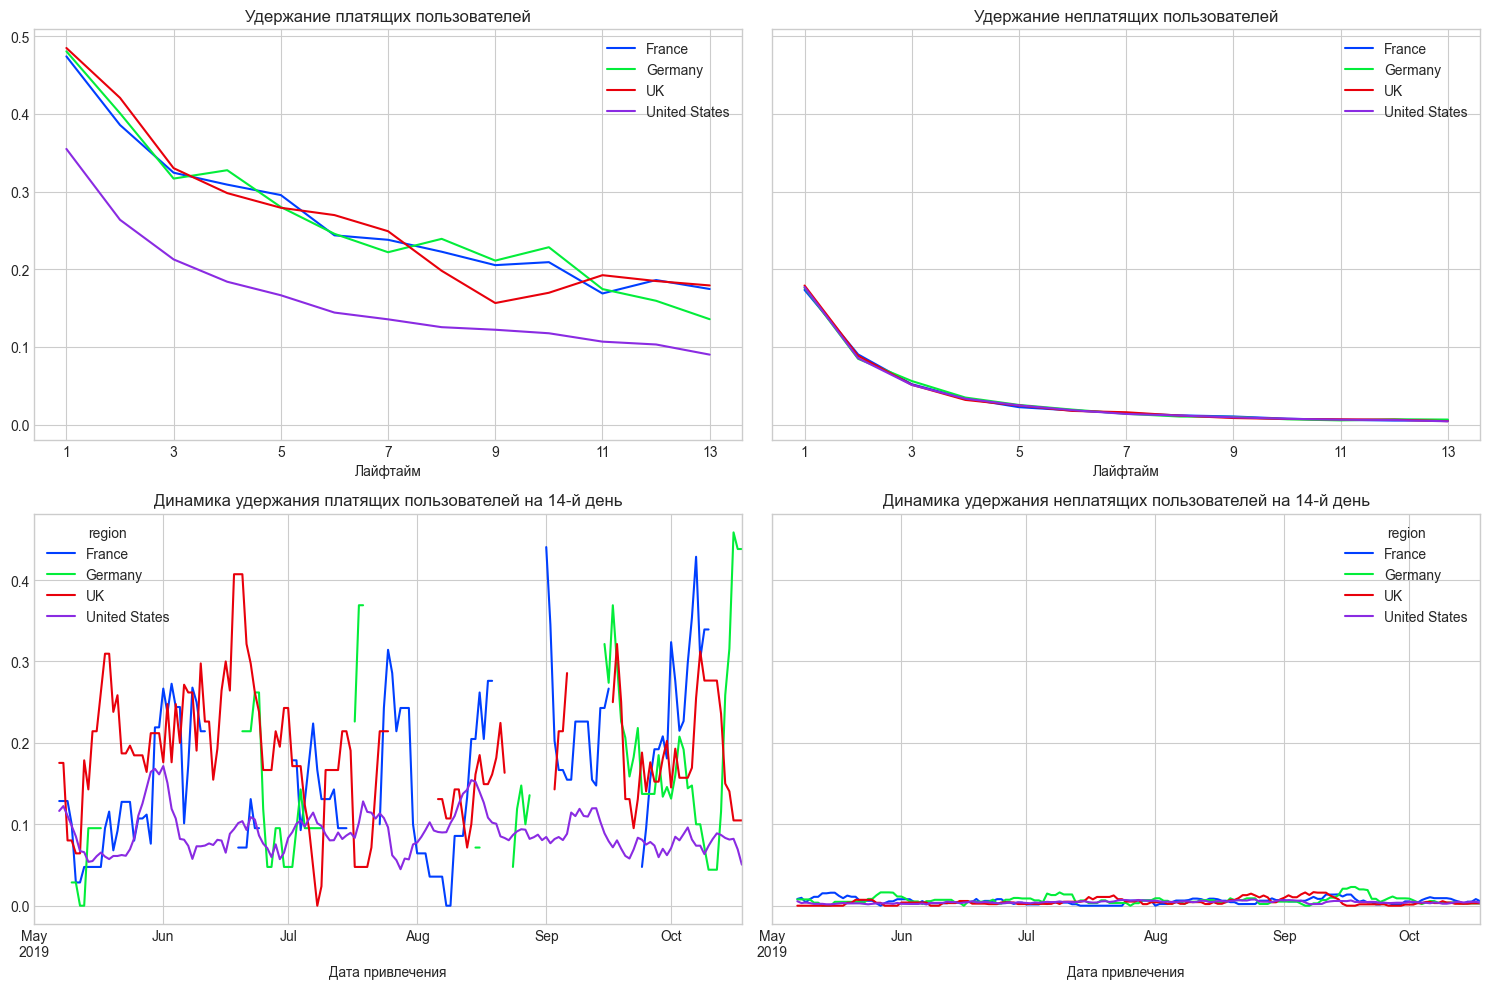

In [89]:
plot_retention(retention, retention_history, horizon_days, window=7)

#### Вывод. Удержание пользователей по регионам и динамика изменения удержания

Самое низкое удержание платящих пользователей на 14-й день в США - 9%. Удержание Германии 13.6%, Франции 17.5%, Великобритании 17.9%. Удержание в Великобритании проседает на 9-й день, Германии на 11-й день. 

В СЩА каждый день есть пользователи, дожившие до 14-го дня "жизни" в приложении. По другим странам такое выполняется не всегда. 

Удержание неплатящих пользователей соизмеримо по всем странам и стремится к 0.4 - 0.7% на 14-й день.  

#### Удержание пользователей по каналам продвижения и динамика изменения удержания

Посчитаем удержание пользователей и выведем график. 

In [90]:
retention_raw, retention, retention_history = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days,
                                                            dimensions=['channel'])
disp(retention.query('payer == True'), horizon_days)
disp(retention.query('payer == False'), horizon_days)

Построим графики. 

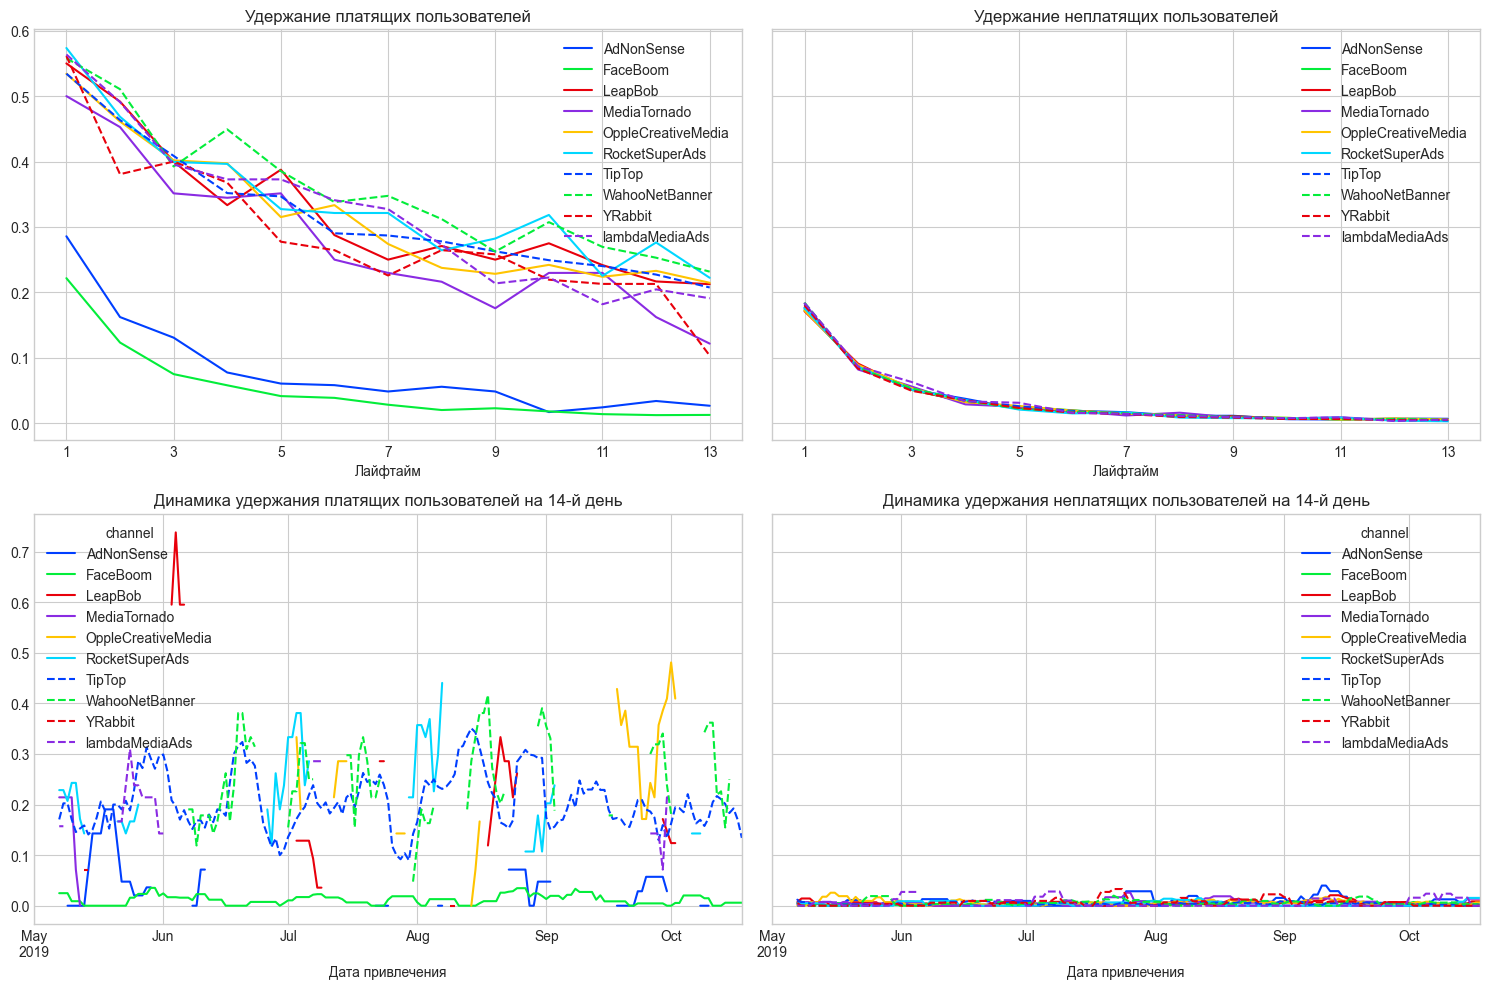

In [91]:
plot_retention(retention, retention_history, horizon_days, window=7)

#### Вывод. Удержание пользователей по каналам продвижения и динамика изменения удержания

Удержание платящих пользователей на каналах AdNonSense и FaceBoom самое низкое по сравнению с другими каналами.
На четвертый день жизни в нашем приложении удержание AdNonSense 13.1%, FaceBoom 7.5% против 35.1% - 40.2% в других каналах, на 14-й AdNonSense 2.7%, FaceBoom 1.3%.

Вероятно, пользователи, приходящие с AdNonSense и FaceBoom больше ориентированы на другие решения. 
    
Удержание TipTop на 14-й день 20.7%.
    
Удержание платящих пользователей на 14-й день меняется от месяца к месяцу. Не по каждому каналу есть ежедневно  платящие пользователи, "дожившие" до 14-го дня. Завидной стабильностью в этом смысле отличаются только каналы TipTop и FaceBoom.

Удержание неплатящих пользователей одинаковое по всем каналам привлечения и на 14-й день и стремится к 0.5%.
Поэтому ключевая задача - побудить пользователя заплатить в приложении в первые три дня его "жизни". 

#### Удержание пользователей по странам и каналам продвижения, динамика изменения удержания

Проведем вычисления.

In [107]:
retention_raw, retention, retention_history = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days,
                                                            dimensions=['region', 'channel'])
# Выберем только платящих пользователей
result = retention.query('payer == True')
# Расчитаем удержанный размер когорты на конец horizon_days
result.insert(loc=1, column='cohort_size_end', value=(result['cohort_size'] * result[horizon_days-1]))
# Выведем на экран
(result
     .style
     .format(formatter='{:.1%}', subset=list(range(horizon_days)))
     .format(formatter='{:.0f}', subset=['cohort_size', 'cohort_size_end'])
)

#### Вывод. Удержание пользователей по странам и каналам продвижения, динамика изменения удержания

По региону США трафик приводят каналы FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit.

На 14-й день наихудшее удержание у канала FaceBoom 1.3%, из привлеченных 3334 человек удержано 42.

Для сравнения у канала RocketSuperAds с удержанием 22.2% из привлеченных 333 человек удержано 74.

Аналогично низким удержанием по другим регионам отличается канал AdNonSense. Франция удержание 2.8%, Германия - 2.3%, Великобритания - 2.9%.

#### Окупаемость рекламы с разбивкой по устройствам

Проведем расчеты.

In [147]:
ltv_dev_raw, ltv_dev, ltv_dev_history, roi_dev, roi_dev_history = get_ltv(profiles_ad, orders, 
    observation_date, horizon_days, dimensions=['device'])
print('ltv_dev')
display(ltv_dev)
print('roi_dev')
disp(roi_dev, horizon_days)

ltv_dev


cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android        20546  0.338516  0.430432  0.499367  0.554014  0.607308   
Mac            17656  0.383074  0.480716  0.550981  0.605935  0.652293   
PC             18006  0.278171  0.361990  0.430789  0.486393  0.540446   
iPhone         31848  0.367544  0.456270  0.523744  0.582822  0.631842   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
Android  0.660413  0.699084  0.737852  0.773269  0.806353  0.833554  0.855898   
Mac      0.686490  0.722725  0.753928  0.792208  0.826521  0.858686  0.885536   
PC       0.582737  0.632413  0.663341  0.702095  0.730698  0.763012  0.789839   
iPhone   0.673269  0.710691  0.749461  0.779517  0.811703  0.839500  0.866544   

             12.0      13.0  
device                       
Android  0.887771  0.912059  
Mac      0.905888  0.931946  
PC       0.813396  0.837620  
iPhone   0.892936  0.915687

roi_dev


Построим графики. 

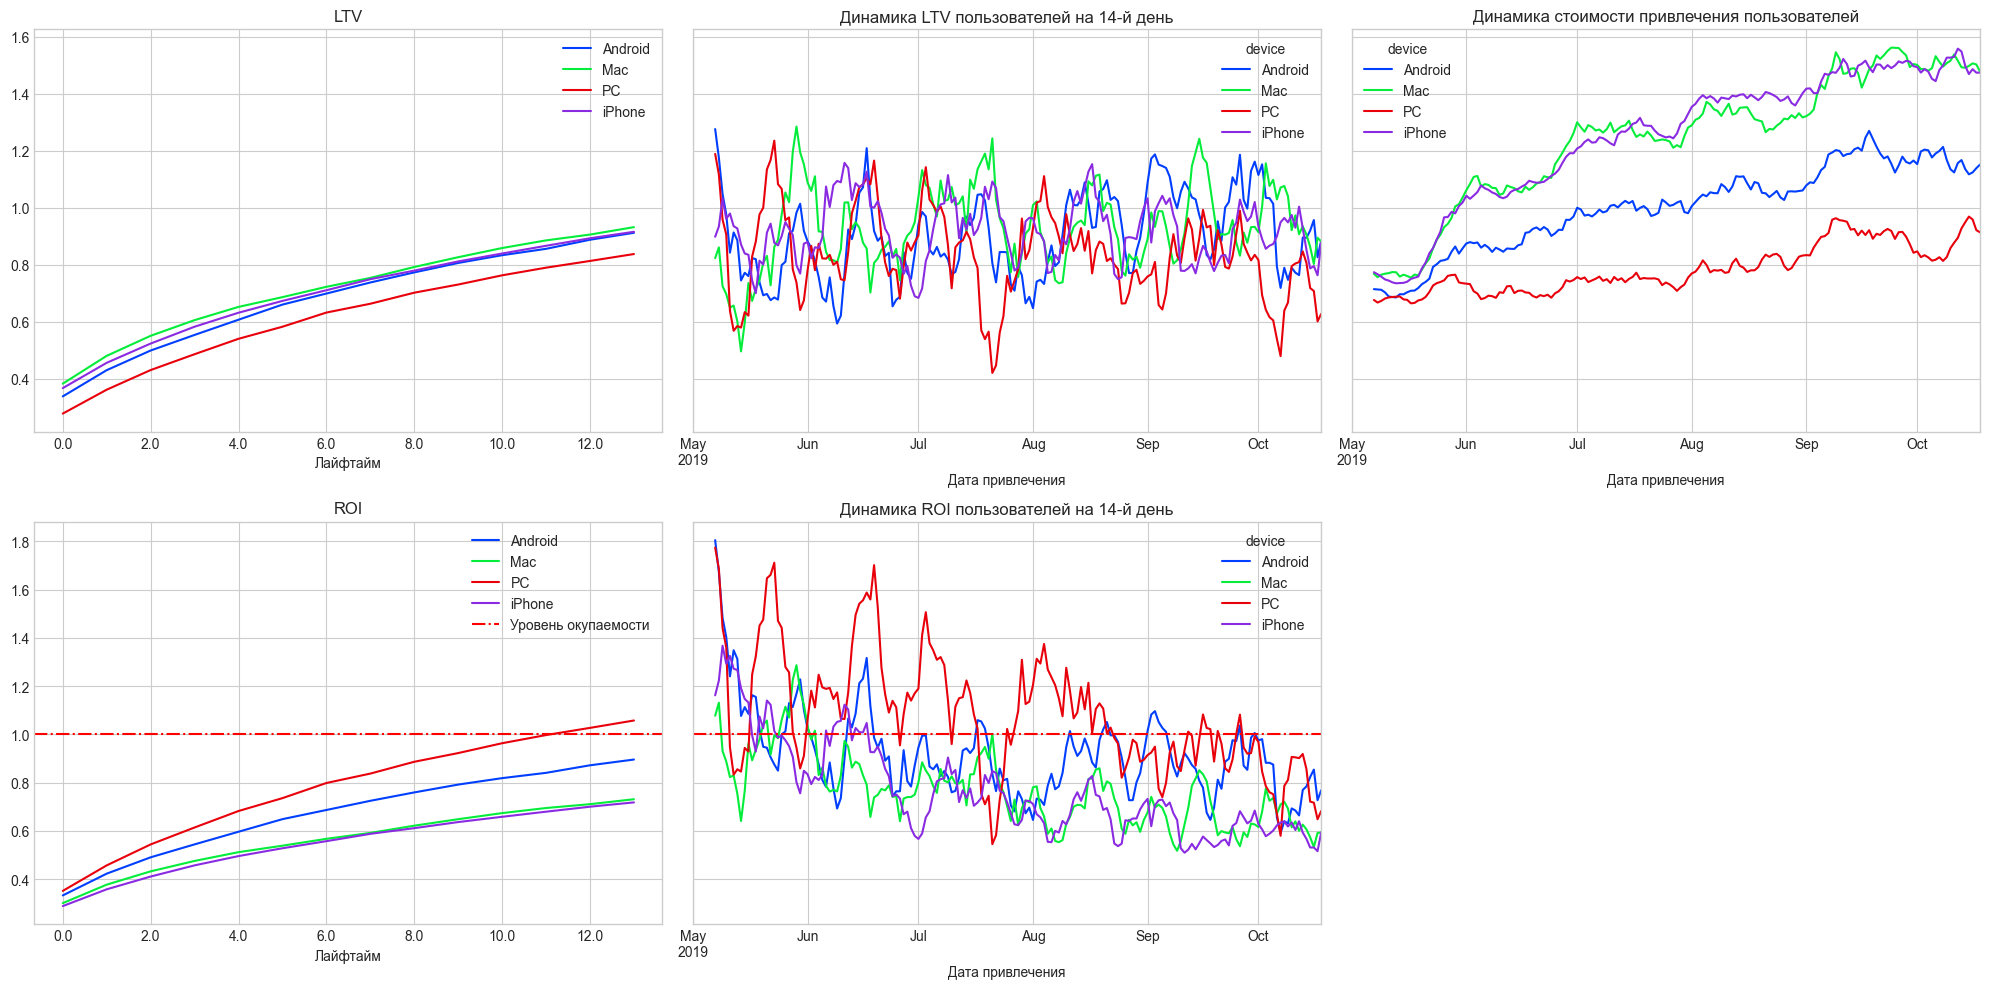

In [148]:
plot_ltv_roi(ltv_dev, ltv_dev_history, roi_dev, roi_dev_history, horizon_days, window=7)

#### Вывод. Окупаемость рекламы с разбивкой по устройствам

Выручка по клиенту на 14-й день соизмерима для всех мобильных платформ \$ 0.9 и чуть ниже для PC 0.8. 

По месяцам выручка с клиента на 14-й день колеблется от \$ 0.8 до 1.1, но есть провалы для платформы PC в средине июля до 0.4, конце августа - начале сентября до 0.7, в начале октября до 0.5. 

Стоимость привлечения пользователей для всех четырех платформ в мае была 0.7 - 0.8 долларов. С июня она стала неуклонно расти до значений в октябре:
- PC \$ 0.9 
- Android \$ 1.1 
- Mac, iPhone \$ 1.5

В рамках предусмотренных бизнес-планом четырнадцати дней реклама не окупается для устройств Mac, iPhone, Android. Такая тенденция наблюдается с июля. 
Рентабельны были только вложения в платформу PC, но с сентября они тоже ушли в минус. 

#### Окупаемость рекламы с разбивкой по странам

Проведем расчеты.

In [149]:
ltv_region_raw, ltv_region, ltv_region_history, roi_region, roi_region_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['region']
)
print('ltv_region')
display(ltv_region)
print('roi_region')
disp(roi_region, horizon_days)

ltv_region


cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               10454  0.194098  0.260847  0.313068  0.361858  0.408828   
Germany               8969  0.186505  0.258393  0.327393  0.375245  0.422870   
UK                   10467  0.219171  0.297764  0.368143  0.417446  0.466190   
United States        58166  0.420127  0.519536  0.590767  0.651292  0.703204   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.452366  0.483395  0.509266  0.543264  0.572860  0.602169   
Germany        0.460704  0.496980  0.534368  0.571094  0.605589  0.641419   
UK             0.504902  0.556895  0.586644  0.624515  0.646445  0.669902   
United States  0.747493  0.787493  0.825692  0.859687  0.893682  0.923263   

                   11.0      12.0      13.0  
region                                       
France         0.624127  0.651338  0.671866  
Germany        0.666011  0.691050  0.712861  
UK             0.693072  0.720731  0.744569  
United States  0.950511  0.975960  1.001063

roi_region


Построим графики. 

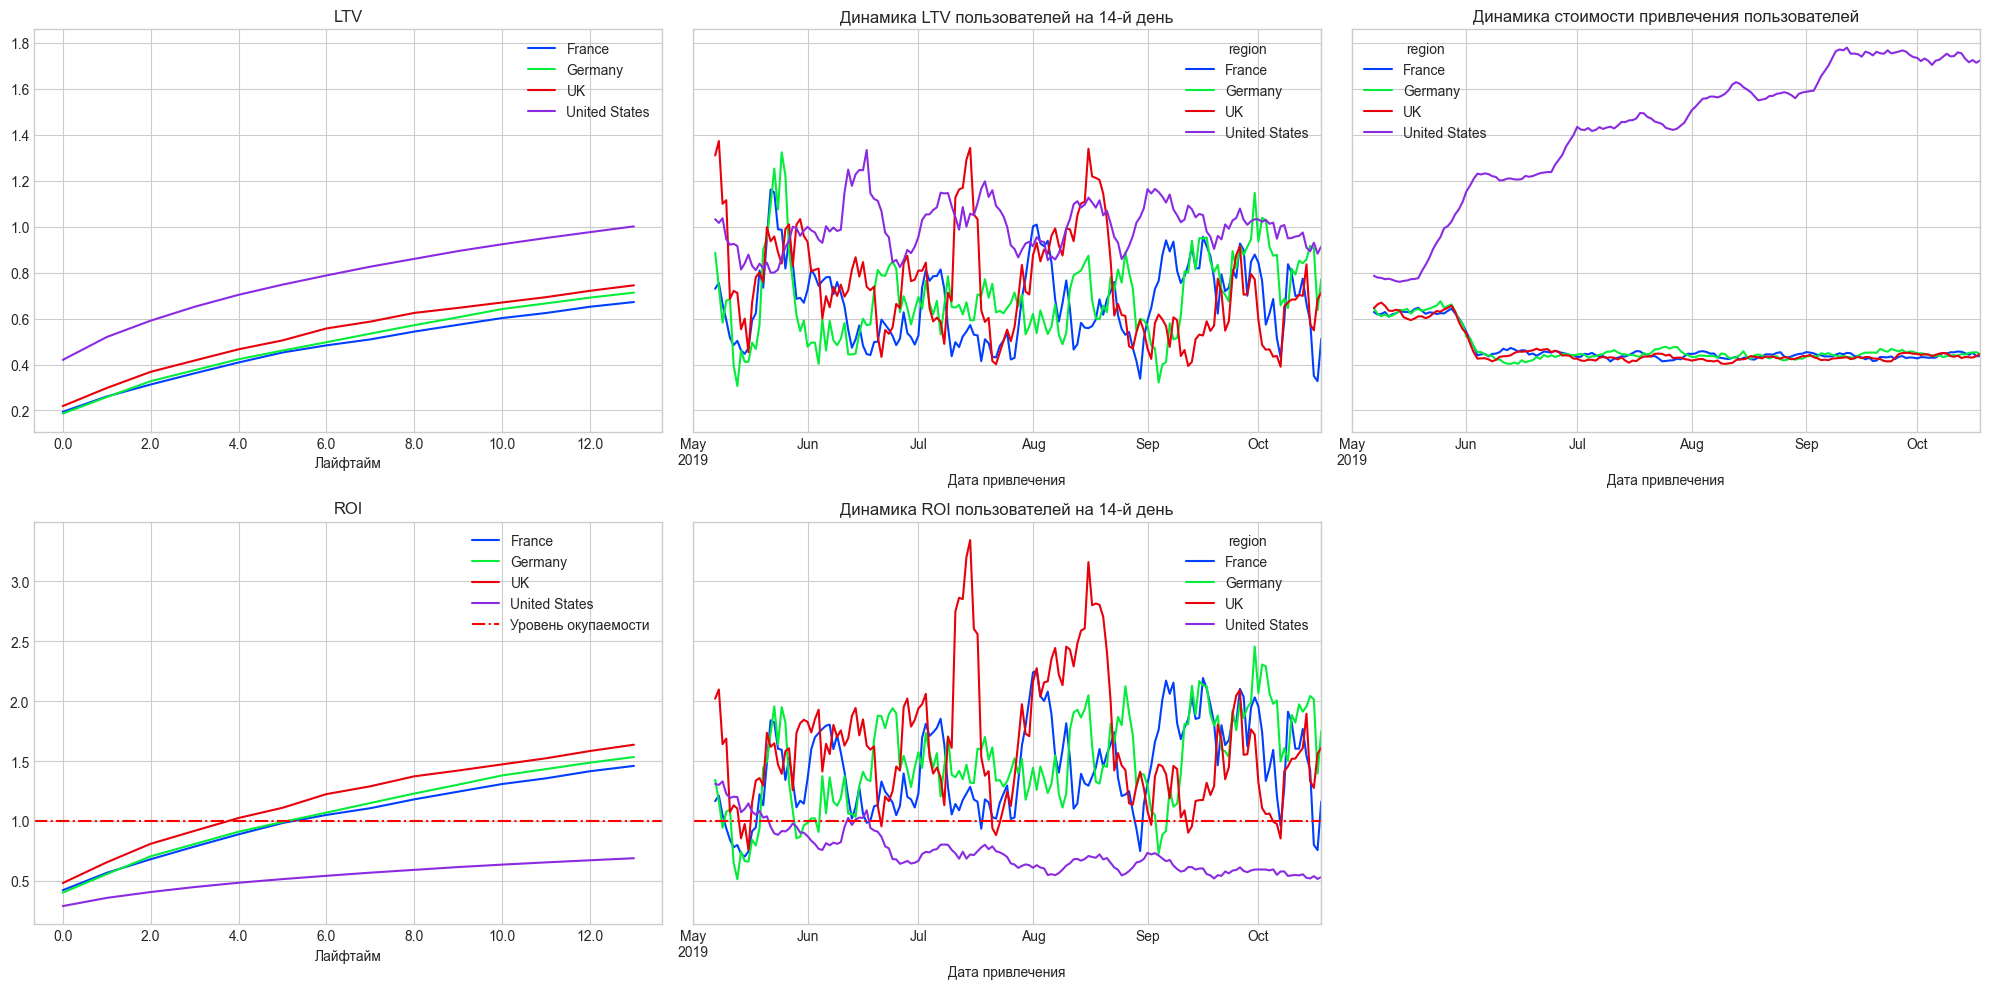

In [96]:
plot_ltv_roi(ltv_region, ltv_region_history, roi_region, roi_region_history, horizon_days, window=7)

#### Вывод. Окупаемость рекламы с разбивкой по странам

Больше всего платят пользователи из США - 1 доллар на 14-й день "жизни" в приложении, меньше всего из Франции 0.67 доллара. Пользователи из Германии и Великобритании тратят соизмеримые суммы - около 0.7 доллара. 

LTV 14-го дня существенно колеблется от месяца к месяцу.
Наибольшая волатильность у Великобритании - от 0.8 до 1.3 доллара. 
Колебания LTV США наблюдаются от 0.8 до 1.2 доллара, Германии - от 0.4 до 0.9, Франции - от 0.4 до 1 доллара. 

Стоимость привлечения пользователей для Франции, Германии, Великобритании соизмерима и составила 0.65 доллара в мае и  затем понизилась до 0.45 долларов. 

Стоимость привлечения для США с 0.8 в начале мая достигла 1.2 в начале июня и далее продолжила расти до 1.7 - 1.8 доллара в сентябре, октябре. 

В предусмотренный бизнес-планом четырнадцати дневный срок с момента привлечения пользователя
инвестиции в рекламу окупаются для Великобритании, Германии, Франции и
не окупаются для пользователей из США. 

Провал ROI 14-го дня для США начался в середине мая.

#### Окупаемость рекламы с разбивкой по рекламным каналам

Проведем расчеты.

In [97]:
ltv_channel_raw, ltv_channel, ltv_channel_history, roi_channel, roi_channel_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['channel']
)

In [150]:
print('ltv_channel')
display(ltv_channel)
print('roi_channel')
disp(roi_channel, horizon_days)

ltv_channel


cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3687  0.507084  0.591546  0.647038  0.686290   
FaceBoom                  27349  0.585464  0.660355  0.699989  0.727945   
LeapBob                    8047  0.106553  0.154925  0.204533  0.234548   
MediaTornado               4148  0.138115  0.192493  0.248074  0.295012   
OppleCreativeMedia         8078  0.097356  0.131953  0.172364  0.207579   
RocketSuperAds             4225  0.208847  0.319420  0.397370  0.456424   
TipTop                    18367  0.343283  0.497948  0.624789  0.739948   
WahooNetBanner             8029  0.191321  0.291537  0.378315  0.443576   
YRabbit                    4077  0.163078  0.212284  0.253897  0.302124   
lambdaMediaAds             2049  0.461840  0.647506  0.781449  0.908633   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.709569  0.735563  0.757217  0.770751  0.792414   
FaceBoom            0.746376  0.759514  0.773965  0.784076  0.791595   
LeapBob             0.258981  0.287507  0.313676  0.333025  0.368394   
MediaTornado        0.333770  0.368660  0.390313  0.420391  0.442049   
OppleCreativeMedia  0.242306  0.267633  0.291726  0.311247  0.330407   
RocketSuperAds      0.516424  0.569808  0.638334  0.685579  0.736622   
TipTop              0.842660  0.936131  1.014657  1.097478  1.172419   
WahooNetBanner      0.516545  0.569499  0.631690  0.677681  0.723926   
YRabbit             0.354778  0.386600  0.413527  0.438008  0.460039   
lambdaMediaAds      1.045061  1.164397  1.266681  1.356789  1.449824   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.805948  0.810279  0.818400  0.830580  0.841416  
FaceBoom            0.800026  0.805537  0.811558  0.816670  0.820684  
LeapBob             0.393199  0.416144  0.436609  0.455212  0.470715  
MediaTornado        0.463703  0.487765  0.510622  0.528667  0.536128  
OppleCreativeMedia  0.348940  0.366360  0.378839  0.397382  0.411590  
RocketSuperAds      0.787893  0.829467  0.862540  0.894665  0.930097  
TipTop              1.246489  1.312076  1.371739  1.428313  1.489010  
WahooNetBanner      0.764326  0.811684  0.848104  0.887885  0.917221  
YRabbit             0.479622  0.501653  0.523689  0.545965  0.559429  
lambdaMediaAds      1.510708  1.584744  1.635886  1.701654  1.772284

roi_channel


Построим графики. 

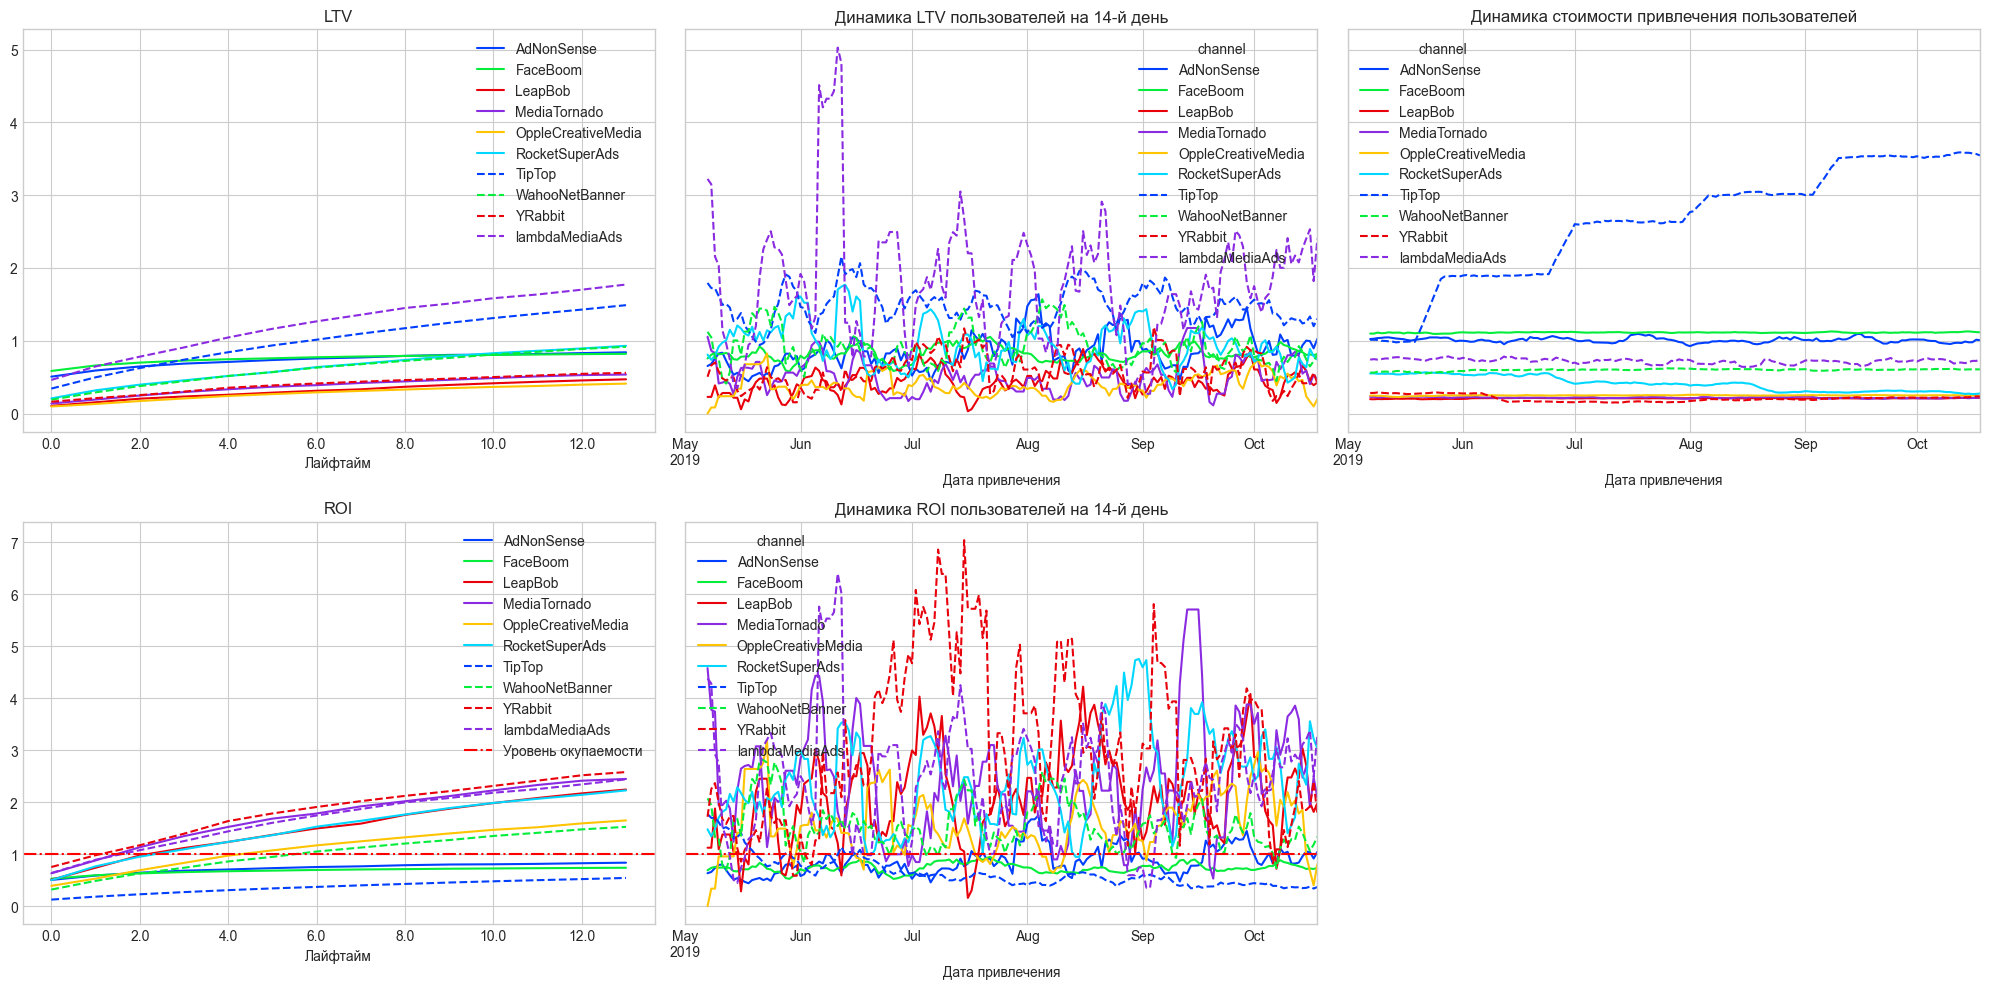

In [151]:
plot_ltv_roi(ltv_channel, ltv_channel_history, roi_channel, roi_channel_history, horizon_days, window=7)

#### Вывод Окупаемость рекламы с разбивкой по рекламным каналам

Наибольшая выручка 14-го дня наблюдается у рекламных каналов lambdaMediaAds 1.77, TipTop 1.49, RocketSuperAds 0.93 и WahooNetBanner 0.92, AdNonSense 0.84, FaceBoom 0.82. Прочие рекламные каналы дают выручку в районе 0.5 доллара с клиента. 

Существенно колеблется выручка 14-го дня для канала продвижения lambdaMediaAds. Пики достигают в некоторые месяцы 3-5 долларов на пользователя. По остальным каналам колебания LTV не превышают от месяца к месяцу плюс-минус 0.5 доллара. 

Динамика стоимости привлечения пользователей стабильная по всем каналам кроме TipTop. В канале TipTop стоимость привлечения росла ежемесячно и выросла с 1 доллара в мае до 3.5 долларов за пользователя в октябре. 

Инвестиции в рекламу окупаются для каналов продвижения (в порядке убывания): YRabbit, MediaTornado, lambdaMediaAds,
LeapBob, RocketSuperAds, OppleCreativeMedia, WahooNetBanner.

Инвестиции в рекламу не окупаются для каналов продвижения TipTop, FaceBoom, AdNonSense.

ROI на 14-й день существенно колеблется по большинству каналов продвижения. 
Наиболее высокие показатели ROI на 14-й день в пиках дают YRabbit, RocketSuperAds, MediaTornado.
В среднем по рентабельным каналам продвижения ROI 200 - 300%, по особо рентабельным 500 - 700%.

#### Окупаемость рекламы с разбивкой по странам и рекламным каналам

Проведем расчеты.

In [140]:
ltv_region_channel_raw, ltv_region_channel, ltv_region_channel_history, roi_region_channel, roi_region_channel_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['region', 'channel']
)

In [152]:
print('ltv_region_channel')
display(ltv_region_channel)

ltv_region_channel


cohort_size       0.0       1.0       2.0  \
region        channel                                                         
France        AdNonSense                 1305  0.468874  0.526996  0.584360   
              LeapBob                    2818  0.098112  0.147693  0.195504   
              OppleCreativeMedia         2811  0.092665  0.129957  0.158360   
              WahooNetBanner             2813  0.195844  0.299488  0.367608   
              lambdaMediaAds              707  0.465842  0.587256  0.679010   
Germany       AdNonSense                 1151  0.529861  0.625265  0.681625   
              LeapBob                    2361  0.087078  0.139928  0.186425   
              OppleCreativeMedia         2413  0.078997  0.105881  0.165889   
              WahooNetBanner             2425  0.177790  0.279031  0.367518   
              lambdaMediaAds              619  0.380517  0.541745  0.678788   
UK            AdNonSense                 1231  0.526296  0.628448  0.681145   
              LeapBob                    2868  0.130879  0.174376  0.228312   
              OppleCreativeMedia         2854  0.117498  0.155964  0.191633   
              WahooNetBanner             2791  0.198520  0.294389  0.398488   
              lambdaMediaAds              723  0.527552  0.796971  0.969516   
United States FaceBoom                  27349  0.585464  0.660355  0.699989   
              MediaTornado               4148  0.138115  0.192493  0.248074   
              RocketSuperAds             4225  0.208847  0.319420  0.397370   
              TipTop                    18367  0.343283  0.497948  0.624789   
              YRabbit                    4077  0.163078  0.212284  0.253897   

                                       3.0       4.0       5.0       6.0  \
region        channel                                                      
France        AdNonSense          0.622605  0.641724  0.680751  0.688398   
              LeapBob             0.224191  0.250752  0.277314  0.291480   
              OppleCreativeMedia  0.195649  0.224408  0.247485  0.270562   
              WahooNetBanner      0.429694  0.504554  0.568422  0.619876   
              lambdaMediaAds      0.820212  0.961386  1.081372  1.173126   
Germany       AdNonSense          0.720643  0.751859  0.769201  0.790877   
              LeapBob             0.220246  0.241804  0.273511  0.297183   
              OppleCreativeMedia  0.196908  0.232064  0.256879  0.281699   
              WahooNetBanner      0.441608  0.520214  0.569600  0.616928   
              lambdaMediaAds      0.759402  0.864200  0.968998  1.081858   
UK            AdNonSense          0.721682  0.741950  0.762218  0.798700   
              LeapBob             0.256499  0.281206  0.309045  0.349062   
              OppleCreativeMedia  0.228350  0.268595  0.296570  0.321048   
              WahooNetBanner      0.459276  0.525442  0.570498  0.656424   
              lambdaMediaAds      1.122863  1.281729  1.412877  1.516404   
United States FaceBoom            0.727945  0.746376  0.759514  0.773965   
              MediaTornado        0.295012  0.333770  0.368660  0.390313   
              RocketSuperAds      0.456424  0.516424  0.569808  0.638334   
              TipTop              0.739948  0.842660  0.936131  1.014657   
              YRabbit             0.302124  0.354778  0.386600  0.413527   

                                       7.0       8.0       9.0      10.0  \
region        channel                                                      
France        AdNonSense          0.699870  0.703693  0.715165  0.719755   
              LeapBob             0.303875  0.353488  0.380050  0.399528   
              OppleCreativeMedia  0.288670  0.302871  0.322401  0.338378   
              WahooNetBanner      0.655354  0.694390  0.738742  0.784863   
              lambdaMediaAds      1.271938  1.358048  1.414512  1.514738   
Germany       AdNonSense          0.803884  0.851599  0.873275  0.881946   
              

In [153]:
print('roi_region_channel')
disp_no_sort(roi_region_channel)

roi_region_channel


#### Вывод. Окупаемость рекламы с разбивкой по странам и рекламным каналам

Из-за нерентабельности канала нужно понизить ставки на рекламные объявления или отказаться от услуг каналов:
- AdNonSense для регионов Франция ROI 75.2%, Германия ROI 90.9%, Великобритания ROI 85.3%;
- TipTop для США ROI 54.1%;
- FaceBoom для США 73.7%.

### Вывод. Окупаемость рекламы

**В целом реклама**, направленная на привлечение пользователей, **не окупается**.

Связано это с закупкой большого количества пользователей через нерентабельные каналы продвижения TipTop, FaceBoom, AdNonSense, которые дают 86.4% бюджета на продвижение с ROI 14-го дня 0.54 - 0.83 при норме ROI больше единицы. 

Нерентабельные пользователи закупаются из США - 66.7% новых клиентов,  пользуются устройствами Mac, iPhone, Android.

Вероятно, проблемы окупаемости связаны с нечетким таргетированием рекламных объявлений, из-за чего на аукционах возникает большая конкуренция. Вероятно, в объявлениях не установлен верхний порог ценового предложения, которое мы готовы рентабельно осилить. Также, вероятно, не проводилось сравнение отдачи от пользователей и стоимости их закупки. 

**Рекомендации отделу маркетинга**

- Понизить ставки по каналу продвижения TipTop, FaceBoom , AdNonSense так как эти каналы вместе дают 86.4% бюджета на продвижение и вместо ROI больше единицы имеют значения на 14-й день 0.54 - 0.83.
- Увеличить финансирование прочих каналов продвижения, так как по ним привлекается 27.3% пользователей и ROI на четырнадцатый день составляет 1.52 - 2.57.  
- Поработать над низкочастотными поисковыми запросами, так как по ним ставки ниже на аукционах.

## 1. Общий вывод

Проведен анализ рекламы мобильного приложения.

Рассмотрен промежуток с 1 мая по 1 ноября 2019 года. 

Выявлено, что в целом реклама, направленная на привлечение пользователей, не окупается.
При этом рекламный бюджет вырос с 10 тыс. долларов в мае до 210 тыс. долларов в октябре.

Общая сумма расходов на маркетинг составила $ 105 497.30.

За отчетный период впервые привлечено 150 008 пользователей.

Пользователи пришли в приложение из четырех стран: США - 66.7% (100 002 человека), Великобритании - 11.7% (17 575 человек), Франции - 11.6% (17 450 человек), Германии - 10% (14 981 человек).

Больше всего платящих пользователей дали США - 6902 человек или 77.7%.
Великобритания дала 700 человек 7.9%, Франции - 663 человека 7.5% , Германии - 616 человек 6.9%.

Конверсия обычных пользователей в платящих в США составляет 6.9%, в Великобритании 4%, Франции 3.8%, Германии 4.1%.

Клиенты пользуются устройствами iPhone 36.3%, Android 23.4%, PC 20.3%, Mac 20%.

Платящие клиенты предпочитают iPhone 38.1%, Android 23.1%, Mac 21.5%, PC 17.3%. 
Всего мобильных клиентов 61.2%. 

Конверсия пользователей в платящих пользователей по устройствам составляет: Mac 6.4%, iPhone 6.2%, Android 5.9%, PC 5%.

Удержание платящих пользователей в первые пять дней в 3 - 4 раз выше чем неплатящих. 

На 14-й день удержание неплатящих пользователей стремится к нулю, удержание платящих сохраняется на уровне около 10%.

Всего используется 11 каналов продвижения. 

Стоимость привлечения пользователей для Франции, Германии, Великобритании соизмерима и составила 0.65 доллара в мае и  затем понизилась до 0.45 долларов. 

Стоимость привлечения для США с 0.8 доллара в начале мая достигла 1.2 в начале июня и далее продолжила расти до 1.7 - 1.8 доллара в сентябре, октябре. 

В целом в заданные бизнес-планом сроки реклама не окупается. Реклама окупалась в мае 2019 года и в середине июня. 
В остальные промежутки времени окупаемости рекламы в четырнадцати дневный срок не наблюдается. 

В среднем пользователи конвертируются в платящих 8% случаев.

**Причины неэффективности привлечения пользователей.**

Причиной неэффективности привлечения пользователей является увеличение ставок на аукционах по закупке пользователей, выполненное через каналы продвижения  TipTop,  FaceBoom для рынка США с мая по октябрь 2019 года и приведшее к нарушению возврата инвестиций, выделенных на рекламу. Видимо, в компании не проводился анализ возврата инвестиций по каналам продвижения. 

Три канала продвижения не обеспечивают возврата инвестиций в предусмотренный бизнес-планом четырнадцати дневный срок:  TipTop,  FaceBoom,  AdNonSense.

**Ключевые метрики:**

Бюджет неэффективных каналов привлечения:
- TipTop $ 54 751.30  - 51.9% всего бюджета на продвижение

- FaceBoom $ 32 445.60 - 30.8% 

- AdNonSense $3 911.25 - 3.7%

Количество привлеченных пользователей:

- TipTop  19 561 — 13.0% от общего числа привлеченных пользователей

- FaceBoom 29 144 - 19.4%

- AdNonSense 3880 — 2.6%

Количество привлеченных платящих пользователей:
- TipTop 1878 - 21.1% от общего числа платящих пользователей
- FaceBoom 3557 - 40.1%
- AdNonSense 440 — 5.0%

Конверсия в платящих пользователей по каналам
- TipTop 2.4%
- FaceBoom 7.7%
- AdNonSense 11.3%

ROI 14-го дня по каналам:
- TipTop 54.1%
- FaceBoom 73.7%
- AdNonSense 83.5%

LTV 14-го дня:
- TipTop $ 1.49

- FaceBoom $ 0.82

- AdNonSense $ 0.84

Стоимость привлечения одного пользователя по каналу:
- TipTop $ 2.8

- FaceBoom $1.1

- AdNonSense $1.01

Период окупаемости пользователя:
- TipTop 27 дней

- FaceBoom 19 дней

- AdNonSense 17 дней

Удержание пользователей по каналам на 14-й день:
- TipTop 20.7%

- FaceBoom 1.3%

- AdNonSense 2.7%

Соответственно большая часть пользователей, привлеченных по этим каналам «не доживает» до момента окупаемости вложенных в рекламу средств. 


**Рекомендации отделу маркетинга**
- Понизить ставки по каналу продвижения TipTop, FaceBoom , AdNonSense, так как эти каналы вместе дают 86.4% бюджета на продвижение и вместо ROI больше 100%  имеют значения на 14-й день 54.1% — 83.5%
- Увеличить финансирование прочих каналов продвижения, так как по ним привлекается 27.3% пользователей и ROI на четырнадцатый день составляет 152% - 257%.  
- Поработать над низкочастотными поисковыми запросами, так как по ним ставки ниже на аукционах.